In [1]:
from dask.distributed import Client,Scheduler
from dask_jobqueue import SLURMCluster
cluster = SLURMCluster(cores=16,processes=1,memory="47GB")
client = Client(cluster)
cluster.scale(cores=48)

/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


In [2]:
cd /g/data/fu5/deg581/OSSE_analysis/notebooks/

/g/data1a/fu5/deg581/OSSE_analysis/notebooks


In [3]:
### run my startup script
exec(open("../src/functions/fun_loadStartup.py").read())
### load my functions
exec(open("../src/functions/fun_loadMyFunctions.py").read())

%config InlineBackend.figure_format='png'

### Load grid
grdFile = '../data/raw/EACouter_varres_grd_mergedBLbry_uhroms.nc'
grid = loadRomsGrid(grdFile)


loaded my modules
loaded my own functions
loading ROMS grid from ../data/raw/EACouter_varres_grd_mergedBLbry_uhroms.nc


In [4]:
# ### Set file names
# runningLocation = 'local'
# if  runningLocation== 'local':
#     hisOSSEFilePath='../data/raw/OSSE_SSHSST/'
#     hisTruthFilePath='../data/raw/truth/final/'
#     obsFinalFilePath='../data/raw/OSSE_SSHSST/' #the 'final' obs files: Verification obs, + NLmodel values from modTruth.
#     modOSSEFilePath='../data/raw/OSSE_SSHSST/'
#     # hisPertFilePath='../data/raw/perturbed/'
# elif runningLocation == 'gdata':
#     hisOSSEFilePath='/g/data/fu5/eac/OSSEs/OSSE_ssh_sst_is4dvar/output/'
#     hisTruthFilePath='/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output/' # Truth file settings
#     obsFinalFilePath='/g/data/fu5/eac/OSSEs/OSSE_ssh_sst_is4dvar/output/'
#     modOSSEFilePath='/g/data/fu5/eac/OSSEs/OSSE_ssh_sst_is4dvar/output/'
# #     hisPertFilePath='/g/data/fu5/deg581/EAC_2yr_perturbedRun_final/output/'

# prefixForecast='roms_fwd_outer0_'
# prefixAnalysis='roms_fwd_outer1_'
# prefixTruth='outer_his_'
# prefixObs='obs_0'
# prefixMod='eac_mod_'
# prefixPert='outer_his_'

# outFigurePath='../cache/out/'

In [5]:
hisTruthFilePath='/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output/' # Truth file settings

hisOSSEFilePath1='/g/data/fu5/eac/OSSEs/OSSE_ssh_sst_is4dvar/output/'
modOSSEFilePath1='/g/data/fu5/eac/OSSEs/OSSE_ssh_sst_is4dvar/output/'
obsOSSEFilePath1='/g/data/fu5/eac/OSSEs/OSSE_ssh_sst_is4dvar/output/'

hisOSSEFilePath2='/g/data/fu5/deg581/OSSE_SSHSST_XBT/output/'
modOSSEFilePath2='/g/data/fu5/deg581/OSSE_SSHSST_XBT/output/'
obsOSSEFilePath2='/g/data/fu5/deg581/OSSE_SSHSST_XBT/output/'

hisOSSEFilePath3='/g/data/fu5/deg581/OSSE_SSHSST_XBT_NORTH/output/'
modOSSEFilePath3='/g/data/fu5/deg581/OSSE_SSHSST_XBT_NORTH/output/'
obsOSSEFilePath3='/g/data/fu5/deg581/OSSE_SSHSST_XBT_NORTH/output/'

hisOSSEFilePath4='/g/data/fu5/deg581/OSSE_SSHSST_XBT_SOUTH/output/'
modOSSEFilePath4='/g/data/fu5/deg581/OSSE_SSHSST_XBT_SOUTH/output/'
obsOSSEFilePath4='/g/data/fu5/deg581/OSSE_SSHSST_XBT_SOUTH/output/'

hisOSSEFilePath5='/g/data/fu5/deg581/OSSE_SSHSST_XBT_PXLINES/output/'
modOSSEFilePath5='/g/data/fu5/deg581/OSSE_SSHSST_XBT_PXLINES/output/'
obsOSSEFilePath5='/g/data/fu5/deg581/OSSE_SSHSST_XBT_PXLINES/output/'

hisOSSEFilePath6='/g/data/fu5/deg581/OSSE_SSHSST_XBT_PXLINES_MONTHLY/output/'
modOSSEFilePath6='/g/data/fu5/deg581/OSSE_SSHSST_XBT_PXLINES_MONTHLY/output/'
obsOSSEFilePath6='/g/data/fu5/deg581/OSSE_SSHSST_XBT_PXLINES_MONTHLY/output/'

hisOSSEFilePath7='/g/data/fu5/deg581/OSSE_SSHSST_XBT_PXLINES_WEEKLY/output/'
modOSSEFilePath7='/g/data/fu5/deg581/OSSE_SSHSST_XBT_PXLINES_WEEKLY/output/'
obsOSSEFilePath7='/g/data/fu5/deg581/OSSE_SSHSST_XBT_PXLINES_WEEKLY/output/'

hisOSSEFilePath8='/g/data/fu5/deg581/OSSE_SSHSST_XBT_PXLINES_2WEEKLY/output/'
modOSSEFilePath8='/g/data/fu5/deg581/OSSE_SSHSST_XBT_PXLINES_2WEEKLY/output/'
obsOSSEFilePath8='/g/data/fu5/deg581/OSSE_SSHSST_XBT_PXLINES_2WEEKLY/output/'

prefixForecast='roms_fwd_outer0_'
prefixAnalysis='roms_fwd_outer1_'
prefixTruth='outer_his_'
prefixObs='obs_0'
prefixMod='eac_mod_'
prefixPert='outer_his_'

outFigurePath='../cache/out/'

In [6]:
# dsm=xr.open_dataset('/g/data/fu5/deg581/OSSE_SSHSST_XBT_PXLINES_MONTHLY/output/roms_fwd_outer0_08101.nc')
# # dsw=xr.open_dataset('/g/data/fu5/deg581/OSSE_SSHSST_XBT_PXLINES_WEEKLY/output/roms_fwd_outer0_08417.nc')
# dsq=xr.open_dataset('/g/data/fu5/deg581/OSSE_SSHSST_XBT_PXLINES/output/roms_fwd_outer0_08101.nc')

In [7]:
# (dsm.temp.isel(s_rho=10,ocean_time=30)-dsq.temp.isel(s_rho=10,ocean_time=30)).plot()


### Load functions

In [8]:
### function to load overlapping OSSE data
def loadOSSE(hisFilePath,prefix,filestring='0*.nc',overlapDays=7):
    chunks = {'ocean_time':1}
    filelist = glob.glob(hisFilePath+prefix+filestring)

    def preprocessRemoveLastDay(ds):
        '''remove the last 7 timesteps from each file'''
        return ds.isel(ocean_time = slice(0,-overlapDays))

#     for files in filelist: 
#         print(files)
    outName = xr.open_mfdataset(filelist,chunks, preprocess=preprocessRemoveLastDay, data_vars='minimal', compat='override', coords='minimal', parallel=True, join='right') 
    print('loaded from '+filelist[0]+' to '+filelist[-1])
    return outName

### function to load overlapping OSSE data
def loadOverlappedNetcdf(hisFilePath,prefix,filestring='0*.nc',overlapDays=7):
    chunks = {'ocean_time':1}
    filelist = sorted(glob.glob(hisFilePath+prefix+filestring))

    def preprocessRemoveLastDay(ds):
        '''remove the last 7 timesteps from each file'''
        return ds.isel(ocean_time = slice(0,-overlapDays))

    outName = xr.open_mfdataset(filelist,chunks, preprocess=preprocessRemoveLastDay, data_vars='minimal', compat='override', coords='minimal', parallel=True, join='right') 
    print('loaded from '+filelist[0]+' to '+filelist[-1])
    return outName

def dropDuplicateTimes(inputData):
    _, index = np.unique(inputData['ocean_time'], return_index=True)
    out = inputData.isel(ocean_time=index)
    return out

def calc_rmseSpatial(input1,input2,etaRange,xiRange):
    err2 = (input1-input2)**2
    # err=err2**(1/2)
    mse = indexMeanMetric(err2,etaRange,xiRange) #mean square error MSE
    output = mse**(1/2)
    return mse,output

# define function for calculating spatial mean
def indexMeanMetric(input,etaRange,xiRange):
    ''' iRange and jRange are converted to slices, so they are the start/end values of the range '''
    output = input.isel(eta_rho=slice(etaRange[0],etaRange[1]), xi_rho=slice(xiRange[0],xiRange[1])).mean(dim='eta_rho', skipna=True).mean(dim='xi_rho', skipna=True)
    return output

def simple_TimeSeries(inputDataX, inputDataY, plt_kwargs={}, ax=None):
    #Plotting
    if ax is None:
        ax = plt.gca()   
    hOut = ax.plot(inputDataX, inputDataY, **plt_kwargs)
    ax.grid(color='black', alpha=0.2, linestyle='--')
    return(hOut)

def plot_spatialMapSubplot(toPlotData, ax=None, pcol_kwargs={}, cont_kwargs={}, kde_kwargs={}):
    #Plotting
    if ax is None:
        ax = plt.gca()
    # plt.subplot(projection=ccrs.PlateCarree())
#     ax = fig.add_subplot(gs[ax], projection=ccrs.PlateCarree())
    ax.set_extent([147, 162.5, -42, -25])
    feature = ax.add_feature(Coast, edgecolor='black',facecolor='gray')
    im=toPlotData.plot.pcolormesh('lon_rho','lat_rho',ax=ax, add_colorbar=False, **pcol_kwargs)       
    toPlotData.plot.contour('lon_rho','lat_rho',ax=ax, **cont_kwargs)
    gl = ax.gridlines(draw_labels=True,
                     color='black', alpha=0.2, linestyle='--')
        #gl.xformatter = LONGITUDE_FORMATTER
        #gl.yformatter = LATITUDE_FORMATTER
    gl.right_labels = False
    gl.top_labels = False
    cax = inset_axes(ax,
                 width="5%",  # width = 10% of parent_bbox width
                 height="50%",  # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(.07,.39, 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
    fig.colorbar(im, cax=cax)

def plot_spatialMapGSSubplot(toPlotData, ax=None, pcol_kwargs={}, cont_kwargs={}, kde_kwargs={}):
    #Plotting
    if ax is None:
        ax = plt.gca()
    # plt.subplot(projection=ccrs.PlateCarree())
#     ax = fig.add_subplot(gs[ax], projection=ccrs.PlateCarree())
    ax.set_extent([147, 162.5, -42, -25])
    feature = ax.add_feature(Coast, edgecolor='black',facecolor='gray')
    im=toPlotData.plot.pcolormesh('lon_rho','lat_rho',ax=ax, add_colorbar=False, **pcol_kwargs)       
    toPlotData.plot.contour('lon_rho','lat_rho',ax=ax, **cont_kwargs)
    gl = ax.gridlines(draw_labels=True,
                     color='black', alpha=0.2, linestyle='--')
        #gl.xformatter = LONGITUDE_FORMATTER
        #gl.yformatter = LATITUDE_FORMATTER
    gl.right_labels = False
    gl.top_labels = False
    cax = inset_axes(ax,
                 width="5%",  # width = 10% of parent_bbox width
                 height="50%",  # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(.07,.39, 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
    fig.colorbar(im, cax=cax)

def calc_boxSpatial(grid,etaRange,xiRange):
    pt00lo = grid['lon_rho'].isel(eta_rho=etaRange[0],xi_rho=xiRange[0]).values
    pt01lo = grid['lon_rho'].isel(eta_rho=etaRange[0],xi_rho=xiRange[1]).values
    pt10lo = grid['lon_rho'].isel(eta_rho=etaRange[1],xi_rho=xiRange[0]).values
    pt11lo = grid['lon_rho'].isel(eta_rho=etaRange[1],xi_rho=xiRange[1]).values
    pt00la = grid['lat_rho'].isel(eta_rho=etaRange[0],xi_rho=xiRange[0]).values
    pt01la = grid['lat_rho'].isel(eta_rho=etaRange[0],xi_rho=xiRange[1]).values
    pt10la = grid['lat_rho'].isel(eta_rho=etaRange[1],xi_rho=xiRange[0]).values
    pt11la = grid['lat_rho'].isel(eta_rho=etaRange[1],xi_rho=xiRange[1]).values
    boxLo = np.array([pt00lo, pt01lo, pt11lo, pt10lo, pt00lo])
    boxLa = np.array([pt00la, pt01la, pt11la, pt10la, pt00la])
    return boxLo,boxLa

def datestring_to_serial_day(datestring,epochY=1990,epochm=1,epochd=1,epochH=0,epochM=0):
    import pandas as pd
    import datetime
    serial_day_timedelta = pd.to_datetime(datestring) - datetime.datetime(epochY,epochm,epochd,epochH,epochM)
    corrected_serial_day_number = serial_day_timedelta.days + serial_day_timedelta.seconds/86400
    return corrected_serial_day_number


def serial_day_to_datestring(day,epochY=1990,epochm=1,epochd=1,epochH=0,epochM=0):
    import datetime
    corrected_date = datetime.datetime(epochY,epochm,epochd,epochH,epochM) + datetime.timedelta(day)
    return corrected_date.strftime("%Y-%m-%d %H:%M")

def horizontalSectionROMS(grid,inputVal,targetDepth):
    # v2
    output = grid.transform(inputVal, 'Z', targetDepth,
                                    target_data=inputVal['z_rho0'],
                                    method='linear').squeeze()
    return output

def makeROMSFile(ds,rename=True):
    if rename==True:
        ds = ds.rename({'eta_u': 'eta_rho', 'xi_v': 'xi_rho', 'xi_psi': 'xi_u', 'eta_psi': 'eta_v'})

    coords={'X':{'center':'xi_rho', 'inner':'xi_u'}, 
        'Y':{'center':'eta_rho', 'inner':'eta_v'}, 
        'Z':{'center':'s_rho', 'outer':'s_w'}}

    grid = Grid(ds, coords=coords, periodic=[])

    if ds.Vtransform == 1:
        Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
        z_rho = Zo_rho + ds.zeta * (1 + Zo_rho/ds.h)
        Zo_w = ds.hc * (ds.s_w - ds.Cs_w) + ds.Cs_w * ds.h
        z_w = Zo_w + ds.zeta * (1 + Zo_w/ds.h)
    elif ds.Vtransform == 2:
        Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
        z_rho = ds.zeta + (ds.zeta + ds.h) * Zo_rho
        Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
        z_w = Zo_w * (ds.zeta + ds.h) + ds.zeta

    ds.coords['z_w'] = z_w.where(ds.mask_rho, 0).transpose('ocean_time', 's_w', 'eta_rho', 'xi_rho')
    ds.coords['z_rho'] = z_rho.where(ds.mask_rho, 0).transpose('ocean_time', 's_rho', 'eta_rho', 'xi_rho')
    # Other Option is to transpose arrays and fill NaNs with a minimal depth
    # ds['z_rho'] = z_rho.transpose(*('time', 's_rho','yh','xh'),transpose_coords=False).fillna(hmin)
    # ds['z_w'] = z_w.transpose(*('time', 's_w','yh','xh'),transpose_coords=False).fillna(hmin)
    ds.coords['z_rho0'] = z_rho.mean(dim='ocean_time')

     # interpolate depth of levels at U and V points
    ds['z_u'] = grid.interp(ds['z_rho'], 'X', boundary='fill')
    ds['z_v'] = grid.interp(ds['z_rho'], 'Y', boundary='fill')

    ds['pm_v'] = grid.interp(ds.pm, 'Y')
    ds['pn_u'] = grid.interp(ds.pn, 'X')
    ds['pm_u'] = grid.interp(ds.pm, 'X')
    ds['pn_v'] = grid.interp(ds.pn, 'Y')
    ds['pm_psi'] = grid.interp(grid.interp(ds.pm, 'Y'),  'X') # at psi points (eta_v, xi_u) 
    ds['pn_psi'] = grid.interp(grid.interp(ds.pn, 'X'),  'Y') # at psi points (eta_v, xi_u)

    ds['dx'] = 1/ds.pm
    ds['dx_u'] = 1/ds.pm_u
    ds['dx_v'] = 1/ds.pm_v
    ds['dx_psi'] = 1/ds.pm_psi

    ds['dy'] = 1/ds.pn
    ds['dy_u'] = 1/ds.pn_u
    ds['dy_v'] = 1/ds.pn_v
    ds['dy_psi'] = 1/ds.pn_psi

    ds['dz'] = grid.diff(ds.z_w, 'Z', boundary='fill')
    ds['dz_w'] = grid.diff(ds.z_rho, 'Z', boundary='fill')
    ds['dz_u'] = grid.interp(ds.dz, 'X')
    ds['dz_w_u'] = grid.interp(ds.dz_w, 'X')
    ds['dz_v'] = grid.interp(ds.dz, 'Y')
    ds['dz_w_v'] = grid.interp(ds.dz_w, 'Y')

    ds['dA'] = ds.dx * ds.dy

    metrics = {
        ('X',): ['dx', 'dx_u', 'dx_v', 'dx_psi'], # X distances
        ('Y',): ['dy', 'dy_u', 'dy_v', 'dy_psi'], # Y distances
        ('Z',): ['dz', 'dz_u', 'dz_v', 'dz_w', 'dz_w_u', 'dz_w_v'], # Z distances
        ('X', 'Y'): ['dA'] # Areas
    }
    grid = Grid(ds, coords=coords, metrics=metrics, periodic=[])

    return ds


def makeROMSGridFile(gridIn):
    gridOut = Grid(gridIn, 
    coords={'X':{'center':'xi_rho', 'inner':'xi_u'}, 
    'Y':{'center':'eta_rho', 'inner':'eta_v'}, 
    'Z':{'center':'s_rho', 'outer':'s_w'}},
    metrics={
        ('X',): ['dx', 'dx_u', 'dx_v', 'dx_psi'], # X distances
        ('Y',): ['dy', 'dy_u', 'dy_v', 'dy_psi'], # Y distances
        ('Z',): ['dz', 'dz_u', 'dz_v', 'dz_w', 'dz_w_u', 'dz_w_v'], # Z distances
        ('X', 'Y'): ['dA'] # Areas
    },
    periodic=False)
    return gridOut


def makeROMSFile_zrho(ds):
    if ds.Vtransform == 1:
        Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
        z_rho = Zo_rho + ds.zeta * (1 + Zo_rho/ds.h)
    elif ds.Vtransform == 2:
        Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
        z_rho = ds.zeta + (ds.zeta + ds.h) * Zo_rho
    ds.coords['z_rho0'] = z_rho.where(ds.mask_rho, 0).transpose('ocean_time', 's_rho', 'eta_rho', 'xi_rho').mean(dim='ocean_time')
    return ds

# Now plot results

*Config the time range*

the time range 01-01-2012 to 01-01-2013 is covered by the serial dates:

8037 (03-01-2012)

to

8401 (01-01-2013)

In [9]:
timeRange = [8037, 8401]#8401]

datelist = np.array(range(timeRange[0],timeRange[1],4))

timeCoordinate=[]
for tt in datelist:
    timeCoordinate.append(serial_day_to_datestring(int(tt)))
timeCoordinate = np.asarray(timeCoordinate, dtype='datetime64[s]')

iteration = np.arange(1,16)
Mouter = np.arange(1,3)
cost_var = np.arange(1,13)

In [10]:
pRangeSSH=405
pRangeSST=340
pRangeXBT=939

In [11]:
Surf1 = xr.open_dataset(hisOSSEFilePath1+prefixAnalysis+'0'+str(datelist[0])+'.nc')
Surf1['dA'] = 1/Surf1.pm * 1/Surf1.pn
weights = Surf1.dA
weights.name = "weights"

time_length = len(Surf1.ocean_time.values)
timeCoordinate = Surf1.ocean_time - Surf1.ocean_time[0]


Surf1 = makeROMSFile(Surf1)
grid = makeROMSGridFile(Surf1)

In [12]:
from time import gmtime, strftime


In [13]:
# re-calculate
Yes = 1
if Yes:
    timeVec = np.zeros(len(datelist))
    XBTNS_SSH_RMS_Ana = np.zeros([time_length,len(datelist)])
    XBTPX_SSH_RMS_Ana = np.zeros([time_length,len(datelist)])
    XBTPX_MONTHLY_SSH_RMS_Ana = np.zeros([time_length,len(datelist)])
    XBTNS_SSH_RMS_For = np.zeros([time_length,len(datelist)])
    XBTPX_MONTHLY_SSH_RMS_For  = np.zeros([time_length,len(datelist)])
    XBTPX_SSH_RMS_For = np.zeros([time_length,len(datelist)])

    XBTNS_SST_RMS_Ana = np.zeros([time_length,len(datelist)])
    XBTPX_MONTHLY_SST_RMS_Ana  = np.zeros([time_length,len(datelist)])
    XBTPX_SST_RMS_Ana = np.zeros([time_length,len(datelist)])
    XBTNS_SST_RMS_For = np.zeros([time_length,len(datelist)])
    XBTPX_MONTHLY_SST_RMS_For  = np.zeros([time_length,len(datelist)])
    XBTPX_SST_RMS_For = np.zeros([time_length,len(datelist)])

    XBTNS_temp250_RMS_Ana = np.zeros([time_length,len(datelist)])
    XBTPX_MONTHLY_temp250_RMS_Ana  = np.zeros([time_length,len(datelist)])
    XBTPX_temp250_RMS_Ana = np.zeros([time_length,len(datelist)])
    XBTNS_temp250_RMS_For = np.zeros([time_length,len(datelist)])
    XBTPX_MONTHLY_temp250_RMS_For  = np.zeros([time_length,len(datelist)])
    XBTPX_temp250_RMS_For = np.zeros([time_length,len(datelist)])

    XBTNS_temp500_RMS_Ana = np.zeros([time_length,len(datelist)])
    XBTPX_MONTHLY_temp500_RMS_Ana  = np.zeros([time_length,len(datelist)])
    XBTPX_temp500_RMS_Ana = np.zeros([time_length,len(datelist)])
    XBTNS_temp500_RMS_For = np.zeros([time_length,len(datelist)])
    XBTPX_MONTHLY_temp500_RMS_For  = np.zeros([time_length,len(datelist)])
    XBTPX_temp500_RMS_For = np.zeros([time_length,len(datelist)])

    # fig,ax=plt.subplots(nrows=2,figsize=(10,5))

    rr=0
    for dates in datelist:
        print('----> loading ...'+str(dates))
        print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
        # load ana
        filenameTruth = hisTruthFilePath+prefixTruth+'0'+str(dates)+'.nc'
        tru = xr.open_dataset(filenameTruth)

        # filenameSurf_Ana = hisOSSEFilePath1+prefixAnalysis+'0'+str(dates)+'.nc'
        filenameXBTNS_Ana = hisOSSEFilePath2+prefixAnalysis+'0'+str(dates)+'.nc'
        filenamePX_MONTHLY_Ana = hisOSSEFilePath6+prefixAnalysis+'0'+str(dates)+'.nc'
        filenamePX_Ana = hisOSSEFilePath5+prefixAnalysis+'0'+str(dates)+'.nc'
        # sur_Ana = xr.open_dataset(filenameSurf_Ana)
        xbtNS_Ana = xr.open_dataset(filenameXBTNS_Ana)
        xbtPX_MONTHLY_Ana = xr.open_dataset(filenamePX_MONTHLY_Ana)
        xbtPX_Ana = xr.open_dataset(filenamePX_Ana)

        # load forecast
        # filenameSurf_For = hisOSSEFilePath1+prefixForecast+'0'+str(dates)+'.nc'
        filenameXBTNS_For = hisOSSEFilePath2+prefixForecast+'0'+str(dates)+'.nc'
        filenamePX_MONTHLY_For = hisOSSEFilePath6+prefixForecast+'0'+str(dates)+'.nc'
        filenamePX_For = hisOSSEFilePath5+prefixForecast+'0'+str(dates)+'.nc'
        # sur_For = xr.open_dataset(filenameSurf_For)
        xbtNS_For = xr.open_dataset(filenameXBTNS_For)
        xbtPX_MONTHLY_For = xr.open_dataset(filenamePX_MONTHLY_For)
        xbtPX_For = xr.open_dataset(filenamePX_For)

        print('correct formats ...'+str(dates))
        print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
        #correct weird roms formats
        tru = makeROMSFile_zrho(tru)
        # sur_For = makeROMSFile_zrho(sur_For)
        xbtNS_For = makeROMSFile_zrho(xbtNS_For)
        xbtPX_MONTHLY_For = makeROMSFile_zrho(xbtPX_MONTHLY_For)
        xbtPX_For = makeROMSFile_zrho(xbtPX_For)
        # sur_Ana = makeROMSFile_zrho(sur_Ana)
        xbtNS_Ana = makeROMSFile_zrho(xbtNS_Ana)
        xbtPX_MONTHLY_Ana = makeROMSFile_zrho(xbtPX_MONTHLY_Ana)
        xbtPX_Ana = makeROMSFile_zrho(xbtPX_Ana)
        
        print('load truth zeta and temp')
        print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
        tru.temp.load()
        tru.zeta.load()
        
        print('calc rms ...'+str(dates))
        print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
        # SSH RMS
        XBTNS_SSH_RMS_Ana[:,rr] = ((((tru.zeta - xbtNS_Ana.zeta)**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        XBTPX_MONTHLY_SSH_RMS_Ana[:,rr]  = ((((tru.zeta - xbtPX_MONTHLY_Ana.zeta)**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        XBTPX_SSH_RMS_Ana[:,rr] = ((((tru.zeta - xbtPX_Ana.zeta)**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        XBTNS_SSH_RMS_For[:,rr] = ((((tru.zeta - xbtNS_For.zeta)**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        XBTPX_MONTHLY_SSH_RMS_For[:,rr]  = ((((tru.zeta - xbtPX_MONTHLY_For.zeta)**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        XBTPX_SSH_RMS_For[:,rr] = ((((tru.zeta - xbtPX_For.zeta)**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)

        # SST RMS
        XBTNS_SST_RMS_Ana[:,rr] = ((((tru.temp.isel(s_rho=-1) - xbtNS_Ana.temp.isel(s_rho=-1))**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        XBTPX_MONTHLY_SST_RMS_Ana[:,rr]  = ((((tru.temp.isel(s_rho=-1) - xbtPX_MONTHLY_Ana.temp.isel(s_rho=-1))**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        XBTPX_SST_RMS_Ana[:,rr] = ((((tru.temp.isel(s_rho=-1) - xbtPX_Ana.temp.isel(s_rho=-1))**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        XBTNS_SST_RMS_For[:,rr] = ((((tru.temp.isel(s_rho=-1) - xbtNS_For.temp.isel(s_rho=-1))**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        XBTPX_MONTHLY_SST_RMS_For[:,rr]  = ((((tru.temp.isel(s_rho=-1) - xbtPX_MONTHLY_For.temp.isel(s_rho=-1))**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        XBTPX_SST_RMS_For[:,rr] = ((((tru.temp.isel(s_rho=-1) - xbtPX_For.temp.isel(s_rho=-1))**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)

        # temp250 RMS
        truth_temp_250 = horizontalSectionROMS(grid, tru.temp, np.array([-250]))
        XBTNS_temp250_RMS_Ana[:,rr] = (((( truth_temp_250 - horizontalSectionROMS(grid, xbtNS_Ana.temp, np.array([-250])) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        XBTPX_MONTHLY_temp250_RMS_Ana[:,rr]  = (((( truth_temp_250 - horizontalSectionROMS(grid, xbtPX_MONTHLY_Ana.temp, np.array([-250])) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        XBTPX_temp250_RMS_Ana[:,rr] = (((( truth_temp_250 - horizontalSectionROMS(grid, xbtPX_Ana.temp, np.array([-250])) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        XBTNS_temp250_RMS_For[:,rr] = (((( truth_temp_250 - horizontalSectionROMS(grid, xbtNS_For.temp, np.array([-250])) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        XBTPX_MONTHLY_temp250_RMS_For[:,rr]  = (((( truth_temp_250 - horizontalSectionROMS(grid, xbtPX_MONTHLY_For.temp, np.array([-250])) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        XBTPX_temp250_RMS_For[:,rr] = (((( truth_temp_250 - horizontalSectionROMS(grid, xbtPX_For.temp, np.array([-250])) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)

        # temp500 RMS
        truth_temp_500 = horizontalSectionROMS(grid, tru.temp, np.array([-500]))
        XBTNS_temp500_RMS_Ana[:,rr] = (((( truth_temp_500 - horizontalSectionROMS(grid, xbtNS_Ana.temp, np.array([-500])) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        XBTPX_MONTHLY_temp500_RMS_Ana[:,rr]  = (((( truth_temp_500 - horizontalSectionROMS(grid, xbtPX_MONTHLY_Ana.temp, np.array([ -500])) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        XBTPX_temp500_RMS_Ana[:,rr] = (((( truth_temp_500 - horizontalSectionROMS(grid, xbtPX_Ana.temp, np.array([-500])) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        XBTNS_temp500_RMS_For[:,rr] = (((( truth_temp_500 - horizontalSectionROMS(grid, xbtNS_For.temp, np.array([-500])) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        XBTPX_MONTHLY_temp500_RMS_For[:,rr]  = (((( truth_temp_500 - horizontalSectionROMS(grid, xbtPX_MONTHLY_For.temp, np.array([ -500])) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        XBTPX_temp500_RMS_For[:,rr] = (((( truth_temp_500 - horizontalSectionROMS(grid, xbtPX_For.temp, np.array([-500])) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
        
        tru.close()
        tru.close()        
        rr=rr+1



    XBTNS_SSH_RMS_Ana = xr.DataArray(XBTNS_SSH_RMS_Ana.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-N+S SSH RMS Analysis')
    XBTPX_MONTHLY_SSH_RMS_Ana = xr.DataArray(XBTPX_MONTHLY_SSH_RMS_Ana.T,  coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-S SSH RMS Analysis')
    XBTPX_SSH_RMS_Ana = xr.DataArray(XBTPX_SSH_RMS_Ana.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-PXLINES SSH RMS Analysis')
    XBTNS_SSH_RMS_For = xr.DataArray(XBTNS_SSH_RMS_For.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-N+S SSH RMS Forecast')
    XBTPX_MONTHLY_SSH_RMS_For = xr.DataArray(XBTPX_MONTHLY_SSH_RMS_For.T,  coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-S SSH RMS Forecast')
    XBTPX_SSH_RMS_For = xr.DataArray(XBTPX_SSH_RMS_For.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-PXLINES SSH RMS Forecast')

    XBTNS_SSH_RMS_Ana['duration_d'] = (XBTNS_SSH_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
    XBTPX_MONTHLY_SSH_RMS_Ana['duration_d'] = (XBTPX_MONTHLY_SSH_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
    XBTPX_SSH_RMS_Ana['duration_d'] = (XBTPX_SSH_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
    XBTNS_SSH_RMS_For['duration_d'] = (XBTNS_SSH_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
    XBTPX_MONTHLY_SSH_RMS_For['duration_d'] = (XBTPX_MONTHLY_SSH_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
    XBTPX_SSH_RMS_For['duration_d'] = (XBTPX_SSH_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')

    XBTNS_SST_RMS_Ana = xr.DataArray(XBTNS_SST_RMS_Ana.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-N+S SST RMS Analysis')
    XBTPX_MONTHLY_SST_RMS_Ana = xr.DataArray(XBTPX_MONTHLY_SST_RMS_Ana.T,  coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-S SST RMS Analysis')
    XBTPX_SST_RMS_Ana = xr.DataArray(XBTPX_SST_RMS_Ana.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-PXLINES SST RMS Analysis')
    XBTNS_SST_RMS_For = xr.DataArray(XBTNS_SST_RMS_For.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-N+S SST RMS Forecast')
    XBTPX_MONTHLY_SST_RMS_For = xr.DataArray(XBTPX_MONTHLY_SST_RMS_For.T,  coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-S SST RMS Forecast')
    XBTPX_SST_RMS_For = xr.DataArray(XBTPX_SST_RMS_For.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-PXLINES SST RMS Forecast')

    XBTNS_SST_RMS_Ana['duration_d'] = (XBTNS_SST_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
    XBTPX_MONTHLY_SST_RMS_Ana['duration_d'] = (XBTPX_MONTHLY_SST_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
    XBTPX_SST_RMS_Ana['duration_d'] = (XBTPX_SST_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
    XBTNS_SST_RMS_For['duration_d'] = (XBTNS_SST_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
    XBTPX_MONTHLY_SST_RMS_For['duration_d'] = (XBTPX_MONTHLY_SST_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
    XBTPX_SST_RMS_For['duration_d'] = (XBTPX_SST_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')

    XBTNS_temp250_RMS_Ana = xr.DataArray(XBTNS_temp250_RMS_Ana.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-N+S temp250 RMS Analysis')
    XBTPX_MONTHLY_temp250_RMS_Ana = xr.DataArray(XBTPX_MONTHLY_temp250_RMS_Ana.T,  coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-S temp250 RMS Analysis')
    XBTPX_temp250_RMS_Ana = xr.DataArray(XBTPX_temp250_RMS_Ana.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-PXLINES temp250 RMS Analysis')
    XBTNS_temp250_RMS_For = xr.DataArray(XBTNS_temp250_RMS_For.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-N+S temp250 RMS Forecast')
    XBTPX_MONTHLY_temp250_RMS_For = xr.DataArray(XBTPX_MONTHLY_temp250_RMS_For.T,  coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-S temp250 RMS Forecast')
    XBTPX_temp250_RMS_For = xr.DataArray(XBTPX_temp250_RMS_For.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-PXLINES temp250 RMS Forecast')

    XBTNS_temp250_RMS_Ana['duration_d'] = (XBTNS_temp250_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
    XBTPX_MONTHLY_temp250_RMS_Ana['duration_d'] = (XBTPX_MONTHLY_temp250_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
    XBTPX_temp250_RMS_Ana['duration_d'] = (XBTPX_temp250_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
    XBTNS_temp250_RMS_For['duration_d'] = (XBTNS_temp250_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
    XBTPX_MONTHLY_temp250_RMS_For['duration_d'] = (XBTPX_MONTHLY_temp250_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
    XBTPX_temp250_RMS_For['duration_d'] = (XBTPX_temp250_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')

    XBTNS_temp500_RMS_Ana = xr.DataArray(XBTNS_temp500_RMS_Ana.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-N+S temp500 RMS Analysis')
    XBTPX_MONTHLY_temp500_RMS_Ana = xr.DataArray(XBTPX_MONTHLY_temp500_RMS_Ana.T,  coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-S temp500 RMS Analysis')
    XBTPX_temp500_RMS_Ana = xr.DataArray(XBTPX_temp500_RMS_Ana.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-PXLINES temp500 RMS Analysis')
    XBTNS_temp500_RMS_For = xr.DataArray(XBTNS_temp500_RMS_For.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-N+S temp500 RMS Forecast')
    XBTPX_MONTHLY_temp500_RMS_For = xr.DataArray(XBTPX_MONTHLY_temp500_RMS_For.T,  coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-S temp500 RMS Forecast')
    XBTPX_temp500_RMS_For = xr.DataArray(XBTPX_temp500_RMS_For.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-PXLINES temp500 RMS Forecast')

    XBTNS_temp500_RMS_Ana['duration_d'] = (XBTNS_temp500_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
    XBTPX_MONTHLY_temp500_RMS_Ana['duration_d'] = (XBTPX_MONTHLY_temp500_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
    XBTPX_temp500_RMS_Ana['duration_d'] = (XBTPX_temp500_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
    XBTNS_temp500_RMS_For['duration_d'] = (XBTNS_temp500_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
    XBTPX_MONTHLY_temp500_RMS_For['duration_d'] = (XBTPX_MONTHLY_temp500_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
    XBTPX_temp500_RMS_For['duration_d'] = (XBTPX_temp500_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')

----> loading ...8037
2022-08-25 05:42:29
correct formats ...8037
2022-08-25 05:42:32
load truth zeta and temp
2022-08-25 05:43:00
calc rms ...8037
2022-08-25 05:43:07
----> loading ...8041
2022-08-25 05:45:16
correct formats ...8041
2022-08-25 05:45:19
load truth zeta and temp
2022-08-25 05:45:48
calc rms ...8041
2022-08-25 05:45:53
----> loading ...8045
2022-08-25 05:48:03
correct formats ...8045
2022-08-25 05:48:06
load truth zeta and temp
2022-08-25 05:48:33
calc rms ...8045
2022-08-25 05:48:39
----> loading ...8049
2022-08-25 05:50:30
correct formats ...8049
2022-08-25 05:50:34
load truth zeta and temp
2022-08-25 05:50:59
calc rms ...8049
2022-08-25 05:51:06
----> loading ...8053
2022-08-25 05:53:21
correct formats ...8053
2022-08-25 05:53:25
load truth zeta and temp
2022-08-25 05:53:48
calc rms ...8053
2022-08-25 05:53:54
----> loading ...8057
2022-08-25 05:55:52
correct formats ...8057
2022-08-25 05:55:55
load truth zeta and temp
2022-08-25 05:56:20
calc rms ...8057
2022-08-25 0

In [31]:
# then save to netcdf file
Save=1;
if Save:
    RMS_8037_8401 = xr.merge([XBTNS_SSH_RMS_Ana,XBTPX_SSH_RMS_Ana,XBTNS_SSH_RMS_For,XBTPX_SSH_RMS_For,XBTNS_SST_RMS_Ana,XBTPX_SST_RMS_Ana,XBTNS_SST_RMS_For,XBTPX_SST_RMS_For,XBTNS_temp250_RMS_Ana,XBTPX_temp250_RMS_Ana,XBTNS_temp250_RMS_For,XBTPX_temp250_RMS_For,XBTNS_temp500_RMS_Ana,XBTPX_temp500_RMS_Ana,XBTNS_temp500_RMS_For,XBTPX_temp500_RMS_For,XBTPX_MONTHLY_SSH_RMS_For,XBTPX_MONTHLY_SST_RMS_For,XBTPX_MONTHLY_temp250_RMS_For,XBTPX_MONTHLY_temp500_RMS_For,XBTPX_MONTHLY_SSH_RMS_Ana,XBTPX_MONTHLY_SST_RMS_Ana,XBTPX_MONTHLY_temp250_RMS_Ana,XBTPX_MONTHLY_temp500_RMS_Ana])
    RMS_8037_8401.to_netcdf('RMS_8037_8401_v2.0.nc')

In [15]:
OrLoadFromFile = 0
if OrLoadFromFile:
    RMS_8037_8401 = xr.open_dataset('RMS_8037_8401_for_ana.nc')
    XBTNS_SSH_RMS_Ana = RMS_8037_8401["XBT-N+S SSH RMS Analysis"]
    XBTS_SSH_RMS_Ana = RMS_8037_8401["XBT-S SSH RMS Analysis"]
    XBTPX_SSH_RMS_Ana = RMS_8037_8401["XBT-PXLINES SSH RMS Analysis"]
    XBTNS_SSH_RMS_For = RMS_8037_8401["XBT-N+S SSH RMS Forecast"]
    XBTS_SSH_RMS_For = RMS_8037_8401["XBT-S SSH RMS Forecast"]
    XBTPX_SSH_RMS_For = RMS_8037_8401["XBT-PXLINES SSH RMS Forecast"]

    XBTNS_SST_RMS_Ana = RMS_8037_8401["XBT-N+S SST RMS Analysis"]
    XBTS_SST_RMS_Ana = RMS_8037_8401["XBT-S SST RMS Analysis"]
    XBTPX_SST_RMS_Ana = RMS_8037_8401["XBT-PXLINES SST RMS Analysis"]
    XBTNS_SST_RMS_For = RMS_8037_8401["XBT-N+S SST RMS Forecast"]
    XBTS_SST_RMS_For = RMS_8037_8401["XBT-S SST RMS Forecast"]
    XBTPX_SST_RMS_For = RMS_8037_8401["XBT-PXLINES SST RMS Forecast"]

    XBTNS_temp250_RMS_Ana = RMS_8037_8401["XBT-N+S temp250 RMS Analysis"]
    XBTS_temp250_RMS_Ana = RMS_8037_8401["XBT-S temp250 RMS Analysis"]
    XBTPX_temp250_RMS_Ana = RMS_8037_8401["XBT-PXLINES temp250 RMS Analysis"]
    XBTNS_temp250_RMS_For = RMS_8037_8401["XBT-N+S temp250 RMS Forecast"]
    XBTS_temp250_RMS_For = RMS_8037_8401["XBT-S temp250 RMS Forecast"]
    XBTPX_temp250_RMS_For = RMS_8037_8401["XBT-PXLINES temp250 RMS Forecast"]

    XBTNS_temp500_RMS_Ana = RMS_8037_8401["XBT-N+S temp500 RMS Analysis"]
    XBTS_temp500_RMS_Ana = RMS_8037_8401["XBT-S temp500 RMS Analysis"]
    XBTPX_temp500_RMS_Ana = RMS_8037_8401["XBT-PXLINES temp500 RMS Analysis"]
    XBTNS_temp500_RMS_For = RMS_8037_8401["XBT-N+S temp500 RMS Forecast"]
    XBTS_temp500_RMS_For = RMS_8037_8401["XBT-S temp500 RMS Forecast"]
    XBTPX_temp500_RMS_For = RMS_8037_8401["XBT-PXLINES temp500 RMS Forecast"]
# RMS_8037_8401

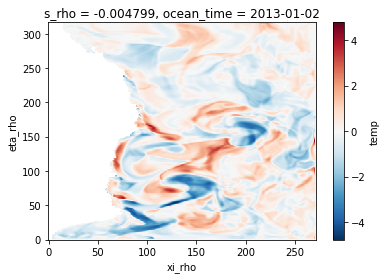

In [32]:
(xbtPX_For.temp.isel(s_rho=-1,ocean_time=30)-xbtPX_MONTHLY_For.temp.isel(s_rho=-1,ocean_time=30)).plot()

In [17]:
XBTPX_temp250_RMS_For.values

array([[0.79859395, 0.79639476, 0.79133739, ..., 0.88530194, 0.89263095,
        0.89425823],
       [0.85915291, 0.86934896, 0.86817344, ..., 0.97366515, 0.97338842,
        0.973644  ],
       [0.93402698, 0.92793564, 0.93335163, ..., 0.98698394, 0.9846113 ,
        0.99031352],
       ...,
       [2.91149376, 2.88248703, 2.87304635, ..., 2.94302223, 2.94413199,
        2.95547906],
       [3.05764688, 3.05038857, 3.04388503, ..., 3.13400875, 3.14771706,
        3.14577067],
       [3.02022685, 3.00871741, 3.0014437 , ..., 3.06693429, 3.0543765 ,
        3.05814635]])

In [18]:
# # XBTNS_SSH_RMS_Ana['duration'] = (XBTNS_SSH_RMS_Ana.astype('timedelta64[D]'))/np.timedelta64(1,'D')
# XBTNS_SSH_RMS_Ana = XBTNS_SSH_RMS_Ana.rename({'duration','duration_ns'})
# XBTNS_SSH_RMS_Ana['duration_d'] = (XBTNS_SSH_RMS_Ana.duration_ns.astype('timedelta64[D]'))/np.timedelta64(1,'D')
# 
# xbtPX_For.z_rho0.isel(s_rho=14).plot.contourf()

In [33]:
outputPath = '/g/data/fu5/deg581/OSSE_analysis/data/proc/'
outputPrefix = 'output_'
expNames=['truth']
outputSuffix = '_8005_8401.nc'
filelistTruth = outputPath+outputPrefix+expNames[0]+outputSuffix
truth = xr.open_dataset(filelistTruth)
time_range_to_load = slice('2012-01-01','2013-01-01')
truth = truth.sel(ocean_time=time_range_to_load)


truth_SSH_mn = truth.zeta.weighted(weights).std("ocean_time").mean(("eta_rho","xi_rho"))
truth_SST_mn = truth.temp.isel(s_rho=-1).weighted(weights).std("ocean_time").mean(("eta_rho","xi_rho"))
truth_temp250_mn = horizontalSectionROMS(grid, truth.temp, np.array([-250])).weighted(weights).std("ocean_time").mean(("eta_rho","xi_rho"))
truth_temp500_mn = horizontalSectionROMS(grid, truth.temp, np.array([-500])).weighted(weights).std("ocean_time").mean(("eta_rho","xi_rho"))

/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)
/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)


In [34]:
# horizontalSectionROMS(grid, truth.temp, np.array([-500])).weighted(weights).std("ocean_time").mean(("eta_rho","xi_rho"))

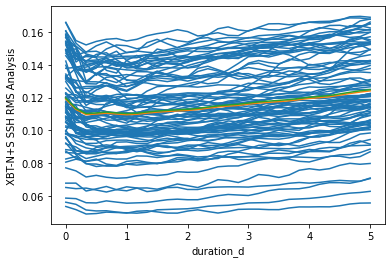

In [35]:
for ii in XBTNS_SSH_RMS_Ana.loop_day:
    XBTNS_SSH_RMS_Ana.sel(loop_day=ii).plot(x='duration_d',color='C0')

XBTNS_SSH_RMS_Ana.mean(dim='loop_day').plot(x='duration_d',color='C1')
XBTNS_SSH_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(x='duration_d',color='C2')


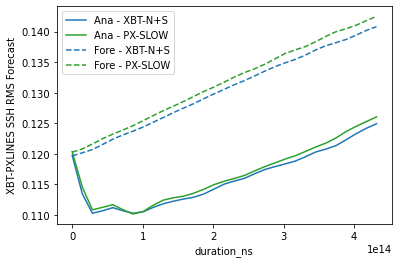

In [36]:
XBTNS_SSH_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - XBT-N+S',color='C0')
# XBTS_SSH_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - XBT-S',color='C1')
XBTPX_SSH_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - PX-SLOW',color='C2')
XBTNS_SSH_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - XBT-N+S',color='C0',linestyle='--')
# XBTS_SSH_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - XBT-S',color='C1',linestyle='--')
XBTPX_SSH_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - PX-SLOW',color='C2',linestyle='--')
plt.legend()


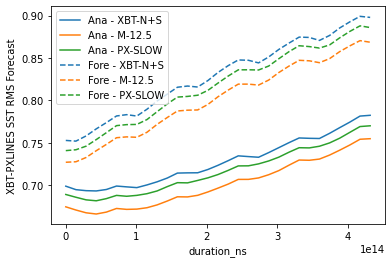

In [37]:
XBTNS_SST_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - XBT-N+S',color='C0')
XBTPX_MONTHLY_SST_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - M-12.5',color='C1')
XBTPX_SST_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - PX-SLOW',color='C2')
XBTNS_SST_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - XBT-N+S',color='C0',linestyle='--')
XBTPX_MONTHLY_SST_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - M-12.5',color='C1',linestyle='--')
XBTPX_SST_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - PX-SLOW',color='C2',linestyle='--')
plt.legend()


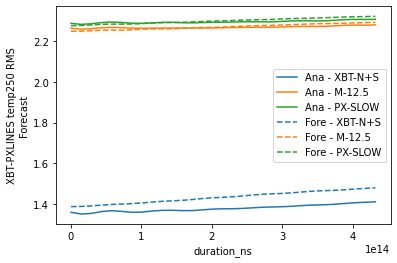

In [38]:
XBTNS_temp250_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - XBT-N+S',color='C0')
XBTPX_MONTHLY_temp250_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - M-12.5',color='C1')
XBTPX_temp250_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - PX-SLOW',color='C2')
XBTNS_temp250_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - XBT-N+S',color='C0',linestyle='--')
XBTPX_MONTHLY_temp250_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - M-12.5',color='C1',linestyle='--')
XBTPX_temp250_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - PX-SLOW',color='C2',linestyle='--')
plt.legend()


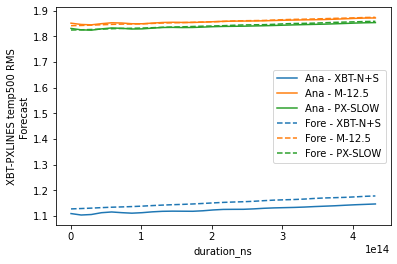

In [39]:
XBTNS_temp500_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - XBT-N+S',color='C0')
XBTPX_MONTHLY_temp500_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - M-12.5',color='C1')
XBTPX_temp500_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - PX-SLOW',color='C2')
XBTNS_temp500_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - XBT-N+S',color='C0',linestyle='--')
XBTPX_MONTHLY_temp500_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - M-12.5',color='C1',linestyle='--')
XBTPX_temp500_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - PX-SLOW',color='C2',linestyle='--')
plt.legend()


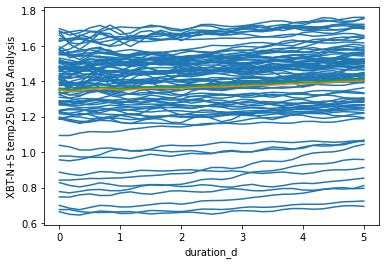

In [40]:
for ii in XBTNS_SSH_RMS_Ana.loop_day:
    XBTNS_temp250_RMS_Ana.sel(loop_day=ii).plot(x='duration_d',color='C0')

XBTNS_temp250_RMS_Ana.mean(dim='loop_day').plot(x='duration_d',color='C1')
XBTNS_temp250_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(x='duration_d',color='C2')


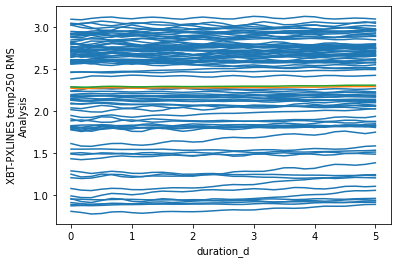

In [43]:
for ii in XBTNS_SSH_RMS_Ana.loop_day:
    XBTPX_temp250_RMS_Ana.sel(loop_day=ii).plot(x='duration_d',color='C0')

XBTPX_temp250_RMS_Ana.mean(dim='loop_day').plot(x='duration_d',color='C1')
XBTPX_temp250_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(x='duration_d',color='C2')


Text(0.5, 0.99, 'Temp (500 m)')

<Figure size 432x288 with 0 Axes>

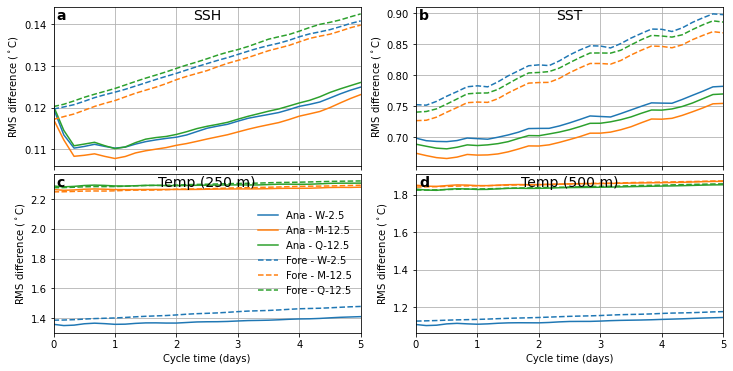

In [44]:


# gs to make a 4 row, 7 col plot
gs = gridspec.GridSpec(nrows=2,ncols=2,wspace=0.18, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[12,6])
ax = None

# SSH
ax = fig.add_subplot(gs[0,0])
XBTNS_SSH_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - XBT-N+S',color='C0')
XBTPX_MONTHLY_SSH_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - M-12.5',color='C1')
XBTPX_SSH_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - PX-SLOW',color='C2')
XBTNS_SSH_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - XBT-N+S',color='C0',linestyle='--')
XBTPX_MONTHLY_SSH_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - M-12.5',color='C1',linestyle='--')
XBTPX_SSH_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - PX-SLOW',color='C2',linestyle='--')
ax.set_ylabel(r'RMS difference ($^\circ$C)')
plt.grid()
ax.set_xlim([0,5])
ax.text(0.01,0.99,'a', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.text(0.5,0.99,'SSH', transform=ax.transAxes,fontsize=14, va='top',ha='center')
ax.set_xticklabels('')

# SST
ax = fig.add_subplot(gs[0,1])
XBTNS_SST_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - XBT-N+S',color='C0')
XBTPX_MONTHLY_SST_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - M-12.5',color='C1')
XBTPX_SST_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - PX-SLOW',color='C2')
XBTNS_SST_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - XBT-N+S',color='C0',linestyle='--')
XBTPX_MONTHLY_SST_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - M-12.5',color='C1',linestyle='--')
XBTPX_SST_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - PX-SLOW',color='C2',linestyle='--')
ax.set_xlabel('')
ax.set_ylabel(r'RMS difference ($^\circ$C)')
plt.grid()
ax.set_xlim([0,5])
ax.text(0.01,0.99,'b', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.text(0.5,0.99,'SST', transform=ax.transAxes,fontsize=14, va='top',ha='center')
ax.set_xticklabels('')

#temp250
ax = fig.add_subplot(gs[1,0])
XBTNS_temp250_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - W-2.5',color='C0')
XBTPX_MONTHLY_temp250_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - M-12.5',color='C1')
XBTPX_temp250_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - Q-12.5',color='C2')
XBTNS_temp250_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - W-2.5',color='C0',linestyle='--')
XBTPX_MONTHLY_temp250_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - M-12.5',color='C1',linestyle='--')
XBTPX_temp250_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - Q-12.5',color='C2',linestyle='--')
ax.set_xlabel('Cycle time (days)')
ax.set_ylabel(r'RMS difference ($^\circ$C)')
plt.grid()
ax.set_xlim([0,5])
# ax.set_ylim([1.3,2.5])
ax.text(0.01,0.99,'c', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.text(0.5,0.99,'Temp (250 m)', transform=ax.transAxes,fontsize=14, va='top',ha='center')
plt.legend(frameon=False)

#temp500
ax = fig.add_subplot(gs[1,1])
XBTNS_temp500_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - W-2.5',color='C0')
XBTPX_MONTHLY_temp500_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - M-12.5',color='C1')
XBTPX_temp500_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - Q-12.5',color='C2')
XBTNS_temp500_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - W-2.5',color='C0',linestyle='--')
XBTPX_MONTHLY_temp500_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - M-12.5',color='C1',linestyle='--')
XBTPX_temp500_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - Q-12.5',color='C2',linestyle='--')
ax.set_xlabel('Cycle time (days)')
ax.set_ylabel(r'RMS difference ($^\circ$C)')
plt.grid()
ax.set_xlim([0,5])
# ax.set_ylim([0.95,2])
ax.text(0.01,0.99,'d', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.text(0.5,0.99,'Temp (500 m)', transform=ax.transAxes,fontsize=14, va='top',ha='center')


<Figure size 432x288 with 0 Axes>

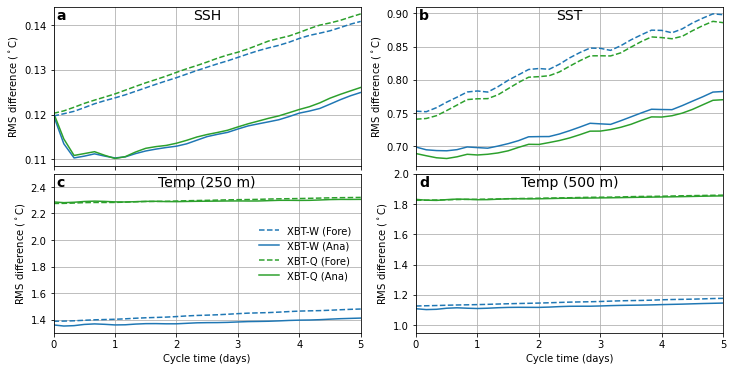

In [49]:


# gs to make a 4 row, 7 col plot
gs = gridspec.GridSpec(nrows=2,ncols=2,wspace=0.18, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[12,6])
ax = None

# SSH
ax = fig.add_subplot(gs[0,0])
XBTNS_SSH_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - XBT-W',color='C0')
# XBTS_SSH_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - XBT-S',color='C1')
XBTPX_SSH_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - XBT-Q',color='C2')
XBTNS_SSH_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - XBT-W',color='C0',linestyle='--')
# XBTS_SSH_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - XBT-S',color='C1',linestyle='--')
XBTPX_SSH_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - XBT-Q',color='C2',linestyle='--')
ax.set_ylabel(r'RMS difference ($^\circ$C)')
plt.grid()
ax.set_xlim([0,5])
ax.text(0.01,0.99,'a', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.text(0.5,0.99,'SSH', transform=ax.transAxes,fontsize=14, va='top',ha='center')
ax.set_xticklabels('')

# SST
ax = fig.add_subplot(gs[0,1])
XBTNS_SST_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - XBT-W',color='C0')
# XBTS_SST_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - XBT-S',color='C1')
XBTPX_SST_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - XBT-Q',color='C2')
XBTNS_SST_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - XBT-W',color='C0',linestyle='--')
# XBTS_SST_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - XBT-S',color='C1',linestyle='--')
XBTPX_SST_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - XBT-Q',color='C2',linestyle='--')
ax.set_xlabel('')
ax.set_ylabel(r'RMS difference ($^\circ$C)')
plt.grid()
ax.set_xlim([0,5])
ax.text(0.01,0.99,'b', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.text(0.5,0.99,'SST', transform=ax.transAxes,fontsize=14, va='top',ha='center')
ax.set_xticklabels('')

#temp250
ax = fig.add_subplot(gs[1,0])
XBTNS_temp250_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='XBT-W (Fore)',color='C0',linestyle='--')
XBTNS_temp250_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='XBT-W (Ana)',color='C0')
# XBTS_temp250_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - XBT-S',color='C1')
XBTPX_temp250_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='XBT-Q (Fore)',color='C2',linestyle='--')
XBTPX_temp250_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='XBT-Q (Ana)',color='C2')
# XBTS_temp250_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - XBT-S',color='C1',linestyle='--')
ax.set_xlabel('Cycle time (days)')
ax.set_ylabel(r'RMS difference ($^\circ$C)')
plt.grid()
ax.set_xlim([0,5])
ax.set_ylim([1.3,2.5])
ax.text(0.01,0.99,'c', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.text(0.5,0.99,'Temp (250 m)', transform=ax.transAxes,fontsize=14, va='top',ha='center')
plt.legend(frameon=False)

#temp500
ax = fig.add_subplot(gs[1,1])
XBTNS_temp500_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - XBT-W',color='C0')
# XBTS_temp500_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - XBT-S',color='C1')
XBTPX_temp500_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - XBT-Q',color='C2')
XBTNS_temp500_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - XBT-W',color='C0',linestyle='--')
# XBTS_temp500_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - XBT-S',color='C1',linestyle='--')
XBTPX_temp500_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - XBT-Q',color='C2',linestyle='--')
ax.set_xlabel('Cycle time (days)')
ax.set_ylabel(r'RMS difference ($^\circ$C)')
plt.grid()
ax.set_xlim([0,5])
ax.set_ylim([0.95,2])
ax.text(0.01,0.99,'d', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.text(0.5,0.99,'Temp (500 m)', transform=ax.transAxes,fontsize=14, va='top',ha='center')


# truth_SSH_std.plot.axhline(ax=ax,label='r$Ref state \sigma$',color='k')
# truth_SST_std = t
# truth_temp250_std
ax.axhline(truth_temp500_mn,label='r$Ref state \sigma$',color='k')

In [ ]:
truth_temp250_std

*Dates of XBT-PXLINES Casts*

8065 -- 11-Mar-2012

8153 -- 28-Apr-2012

8245 -- 29-Jul-2012

8329 -- 21-Oct-2012



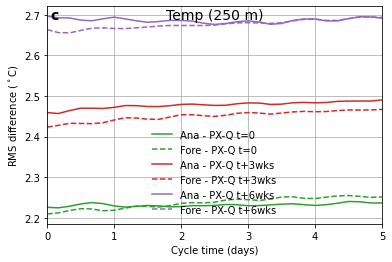

In [50]:

slice1 = np.arange(8065,8073,4)
slice2 = np.arange(8153,8161,4)
slice3 = np.arange(8245,8253,4)
slice4 = np.arange(8329,8337,4)
slice_t0 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8109,8117,4)
slice2 = np.arange(8197,8205,4)
slice3 = np.arange(8289,8297,4)
slice4 = np.arange(8373,8381,4)
slice_t3 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8145,8153,4)
slice2 = np.arange(8237,8245,4)
slice3 = np.arange(8321,8329,4)
slice4 = np.arange(8389,8397,4)
slice_t6 = np.concatenate((slice1,slice2,slice3,slice4))

fig,ax = plt.subplots(1)
XBTPX_temp250_RMS_Ana.sel(loop_day=slice_t0).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - PX-Q t=0',color='C2')
XBTPX_temp250_RMS_For.sel(loop_day=slice_t0).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - PX-Q t=0',color='C2',linestyle='--')
XBTPX_temp250_RMS_Ana.sel(loop_day=slice_t3).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - PX-Q t+3wks',color='C3')
XBTPX_temp250_RMS_For.sel(loop_day=slice_t3).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - PX-Q t+3wks',color='C3',linestyle='--')
XBTPX_temp250_RMS_Ana.sel(loop_day=slice_t6).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - PX-Q t+6wks',color='C4')
XBTPX_temp250_RMS_For.sel(loop_day=slice_t6).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - PX-Q t+6wks',color='C4',linestyle='--')
ax.set_xlabel('Cycle time (days)')
ax.set_ylabel(r'RMS difference ($^\circ$C)')
plt.grid()
ax.set_xlim([0,5])
# ax.set_ylim([1.3,2.5])
ax.text(0.01,0.99,'c', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.text(0.5,0.99,'Temp (250 m)', transform=ax.transAxes,fontsize=14, va='top',ha='center')
plt.legend(frameon=False)

In [51]:
slice_t6

array([8145, 8149, 8237, 8241, 8321, 8325, 8389, 8393])

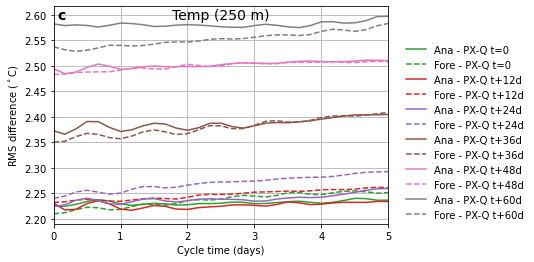

In [52]:

slice1 = np.arange(8065,8065+8,4)
slice2 = np.arange(8153,8153+8,4)
slice3 = np.arange(8245,8245+8,4)
slice4 = np.arange(8329,8329+8,4)
slice_t0 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+12,8065+12+8,4)
slice2 = np.arange(8153+12,8153+12+8,4)
slice3 = np.arange(8245+12,8245+12+8,4)
slice4 = np.arange(8329+12,8329+12+8,4)
slice_t12 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+24,8065+24+8,4)
slice2 = np.arange(8153+24,8153+24+8,4)
slice3 = np.arange(8245+24,8245+24+8,4)
slice4 = np.arange(8329+24,8329+24+8,4)
slice_t24 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+36,8065+36+8,4)
slice2 = np.arange(8153+36,8153+36+8,4)
slice3 = np.arange(8245+36,8245+36+8,4)
slice4 = np.arange(8329+36,8329+36+8,4)
slice_t36 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+48,8065+48+8,4)
slice2 = np.arange(8153+48,8153+48+8,4)
slice3 = np.arange(8245+48,8245+48+8,4)
slice4 = np.arange(8329+48,8329+48+8,4)
slice_t48 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+60,8065+60+8,4)
slice2 = np.arange(8153+60,8153+60+8,4)
slice3 = np.arange(8245+60,8245+60+8,4)
slice4 = np.arange(8329+60,8329+60+8,4)
slice_t60 = np.concatenate((slice1,slice2,slice3,slice4))

# slice1 = np.arange(8065+80,8065+80+8,4)
# slice2 = np.arange(8153+80,8153+80+8,4)
# slice3 = np.arange(8245+80,8245+80+8,4)
# slice4 = np.arange(8329+64,8329+64+8,4)
# slice_t6 = np.concatenate((slice1,slice2,slice3,slice4))






fig,ax = plt.subplots(1)
XBTPX_temp250_RMS_Ana.sel(loop_day=slice_t0).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - PX-Q t=0',color='C2')
XBTPX_temp250_RMS_For.sel(loop_day=slice_t0).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - PX-Q t=0',color='C2',linestyle='--')
XBTPX_temp250_RMS_Ana.sel(loop_day=slice_t12).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - PX-Q t+12d',color='C3')
XBTPX_temp250_RMS_For.sel(loop_day=slice_t12).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - PX-Q t+12d',color='C3',linestyle='--')
XBTPX_temp250_RMS_Ana.sel(loop_day=slice_t24).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - PX-Q t+24d',color='C4')
XBTPX_temp250_RMS_For.sel(loop_day=slice_t24).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - PX-Q t+24d',color='C4',linestyle='--')
XBTPX_temp250_RMS_Ana.sel(loop_day=slice_t36).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - PX-Q t+36d',color='C5')
XBTPX_temp250_RMS_For.sel(loop_day=slice_t36).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - PX-Q t+36d',color='C5',linestyle='--')
XBTPX_temp250_RMS_Ana.sel(loop_day=slice_t48).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - PX-Q t+48d',color='C6')
XBTPX_temp250_RMS_For.sel(loop_day=slice_t48).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - PX-Q t+48d',color='C6',linestyle='--')
XBTPX_temp250_RMS_Ana.sel(loop_day=slice_t60).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - PX-Q t+60d',color='C7')
XBTPX_temp250_RMS_For.sel(loop_day=slice_t60).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - PX-Q t+60d',color='C7',linestyle='--')
ax.set_xlabel('Cycle time (days)')
ax.set_ylabel(r'RMS difference ($^\circ$C)')
plt.grid()
ax.set_xlim([0,5])
# ax.set_ylim([1.3,2.5])
ax.text(0.01,0.99,'c', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.text(0.5,0.99,'Temp (250 m)', transform=ax.transAxes,fontsize=14, va='top',ha='center')
plt.legend(frameon=False,loc=(1.04, 0))

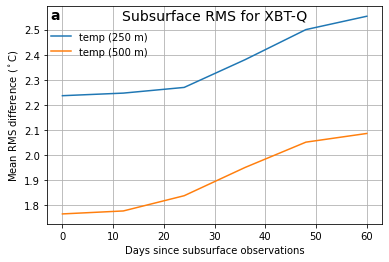

In [53]:


slice1 = np.arange(8065,8065+8,4)
slice2 = np.arange(8153,8153+8,4)
slice3 = np.arange(8245,8245+8,4)
slice4 = np.arange(8329,8329+8,4)
slice_t0 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+12,8065+12+8,4)
slice2 = np.arange(8153+12,8153+12+8,4)
slice3 = np.arange(8245+12,8245+12+8,4)
slice4 = np.arange(8329+12,8329+12+8,4)
slice_t12 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+24,8065+24+8,4)
slice2 = np.arange(8153+24,8153+24+8,4)
slice3 = np.arange(8245+24,8245+24+8,4)
slice4 = np.arange(8329+24,8329+24+8,4)
slice_t24 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+36,8065+36+8,4)
slice2 = np.arange(8153+36,8153+36+8,4)
slice3 = np.arange(8245+36,8245+36+8,4)
slice4 = np.arange(8329+36,8329+36+8,4)
slice_t36 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+48,8065+48+8,4)
slice2 = np.arange(8153+48,8153+48+8,4)
slice3 = np.arange(8245+48,8245+48+8,4)
slice4 = np.arange(8329+48,8329+48+8,4)
slice_t48 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+60,8065+60+8,4)
slice2 = np.arange(8153+60,8153+60+8,4)
slice3 = np.arange(8245+60,8245+60+8,4)
slice4 = np.arange(8329+60,8329+60+8,4)
slice_t60 = np.concatenate((slice1,slice2,slice3,slice4))



forecast_time=[0,12,24,36,48,60]

forecast_meanRMS_250=[]
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t0).mean(dim='loop_day').mean(dim='duration_ns')) 
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t12).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t24).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t36).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t48).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t60).mean(dim='loop_day').mean(dim='duration_ns'))

forecast_meanRMS_500=[]
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t0).mean(dim='loop_day').mean(dim='duration_ns')) 
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t12).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t24).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t36).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t48).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t60).mean(dim='loop_day').mean(dim='duration_ns'))

fig,ax = plt.subplots(1)
ax.plot(forecast_time,forecast_meanRMS_250,label='temp (250 m)')
ax.plot(forecast_time,forecast_meanRMS_500,label='temp (500 m)')
ax.set_xlabel('Days since subsurface observations')
ax.set_ylabel(r'Mean RMS difference ($^\circ$C)')
plt.grid()
# ax.set_xlim([0,5])
# ax.set_ylim([1.3,2.5])
ax.text(0.01,0.99,'a', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.text(0.5,0.99,'Subsurface RMS for XBT-Q', transform=ax.transAxes,fontsize=14, va='top',ha='center')
plt.legend(frameon=False,loc=(0, 0.75))

<Figure size 432x288 with 0 Axes>

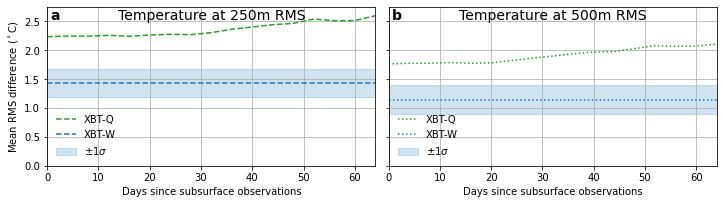

In [54]:


slice1 = np.arange(8065,8065+4,4)
slice2 = np.arange(8153,8153+4,4)
slice3 = np.arange(8245,8245+4,4)
slice4 = np.arange(8329,8329+4,4)
slice_t00 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+4,8065+4+4,4)
slice2 = np.arange(8153+4,8153+4+4,4)
slice3 = np.arange(8245+4,8245+4+4,4)
slice4 = np.arange(8329+4,8329+4+4,4)
slice_t04 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+8,8065+8+4,4)
slice2 = np.arange(8153+8,8153+8+4,4)
slice3 = np.arange(8245+8,8245+8+4,4)
slice4 = np.arange(8329+8,8329+8+4,4)
slice_t08 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+12,8065+12+4,4)
slice2 = np.arange(8153+12,8153+12+4,4)
slice3 = np.arange(8245+12,8245+12+4,4)
slice4 = np.arange(8329+12,8329+12+4,4)
slice_t12 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+16,8065+16+4,4)
slice2 = np.arange(8153+16,8153+16+4,4)
slice3 = np.arange(8245+16,8245+16+4,4)
slice4 = np.arange(8329+16,8329+16+4,4)
slice_t16 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+20,8065+20+4,4)
slice2 = np.arange(8153+20,8153+20+4,4)
slice3 = np.arange(8245+20,8245+20+4,4)
slice4 = np.arange(8329+20,8329+20+4,4)
slice_t20 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+24,8065+24+4,4)
slice2 = np.arange(8153+24,8153+24+4,4)
slice3 = np.arange(8245+24,8245+24+4,4)
slice4 = np.arange(8329+24,8329+24+4,4)
slice_t24 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+28,8065+28+4,4)
slice2 = np.arange(8153+28,8153+28+4,4)
slice3 = np.arange(8245+28,8245+28+4,4)
slice4 = np.arange(8329+28,8329+28+4,4)
slice_t28 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+32,8065+32+4,4)
slice2 = np.arange(8153+32,8153+32+4,4)
slice3 = np.arange(8245+32,8245+32+4,4)
slice4 = np.arange(8329+32,8329+32+4,4)
slice_t32 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+36,8065+36+4,4)
slice2 = np.arange(8153+36,8153+36+4,4)
slice3 = np.arange(8245+36,8245+36+4,4)
slice4 = np.arange(8329+36,8329+36+4,4)
slice_t36 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+40,8065+40+4,4)
slice2 = np.arange(8153+40,8153+40+4,4)
slice3 = np.arange(8245+40,8245+40+4,4)
slice4 = np.arange(8329+40,8329+40+4,4)
slice_t40 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+44,8065+44+4,4)
slice2 = np.arange(8153+44,8153+44+4,4)
slice3 = np.arange(8245+44,8245+44+4,4)
slice4 = np.arange(8329+44,8329+44+4,4)
slice_t44 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+48,8065+48+4,4)
slice2 = np.arange(8153+48,8153+48+4,4)
slice3 = np.arange(8245+48,8245+48+4,4)
slice4 = np.arange(8329+48,8329+48+4,4)
slice_t48 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+52,8065+52+4,4)
slice2 = np.arange(8153+52,8153+52+4,4)
slice3 = np.arange(8245+52,8245+52+4,4)
slice4 = np.arange(8329+52,8329+52+4,4)
slice_t52 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+56,8065+56+4,4)
slice2 = np.arange(8153+56,8153+56+4,4)
slice3 = np.arange(8245+56,8245+56+4,4)
slice4 = np.arange(8329+56,8329+56+4,4)
slice_t56 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+60,8065+60+4,4)
slice2 = np.arange(8153+60,8153+60+4,4)
slice3 = np.arange(8245+60,8245+60+4,4)
slice4 = np.arange(8329+60,8329+60+4,4)
slice_t60 = np.concatenate((slice1,slice2,slice3,slice4))

slice1 = np.arange(8065+64,8065+64+4,4)
slice2 = np.arange(8153+64,8153+64+4,4)
slice3 = np.arange(8245+64,8245+64+4,4)
slice4 = np.arange(8329+64,8329+64+4,4)
slice_t64 = np.concatenate((slice1,slice2,slice3,slice4))

forecast_time=np.arange(0,68,4)

forecast_meanRMS_250=[]
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t00).mean(dim='loop_day').mean(dim='duration_ns')) 
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t04).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t08).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t12).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t16).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t20).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t24).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t28).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t32).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t36).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t40).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t44).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t48).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t52).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t56).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t60).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_250.append(XBTPX_temp250_RMS_For.sel(loop_day=slice_t64).mean(dim='loop_day').mean(dim='duration_ns'))

forecast_meanRMS_500=[]
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t00).mean(dim='loop_day').mean(dim='duration_ns')) 
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t04).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t08).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t12).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t16).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t20).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t24).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t28).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t32).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t36).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t40).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t44).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t48).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t52).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t56).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t60).mean(dim='loop_day').mean(dim='duration_ns'))
forecast_meanRMS_500.append(XBTPX_temp500_RMS_For.sel(loop_day=slice_t64).mean(dim='loop_day').mean(dim='duration_ns'))


# gs to make a 4 row, 7 col plot
gs = gridspec.GridSpec(nrows=2,ncols=2,wspace=0.04, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[12,6])
ax = None

# SSH
ax = fig.add_subplot(gs[0,0])
ax.plot(forecast_time,forecast_meanRMS_250,label='XBT-Q',linestyle='--',color='C2')
# ax.plot(forecast_time,forecast_meanRMS_500,label='temp (500 m)',linestyle=':')
ax.axhspan(XBTNS_temp250_RMS_For.mean(dim='duration_ns').mean(dim='loop_day')-XBTNS_temp250_RMS_For.mean(dim='duration_ns').std(dim='loop_day'),XBTNS_temp250_RMS_For.mean(dim='duration_ns').mean(dim='loop_day')+XBTNS_temp250_RMS_For.mean(dim='duration_ns').std(dim='loop_day'), alpha=0.2, edgecolor='C0',label=r'$\pm1 \sigma$')
# ax.axhspan(XBTNS_temp500_RMS_For.mean(dim='duration_ns').mean(dim='loop_day')-XBTNS_temp500_RMS_For.mean(dim='duration_ns').std(dim='loop_day'),XBTNS_temp500_RMS_For.mean(dim='duration_ns').mean(dim='loop_day')+XBTNS_temp500_RMS_For.mean(dim='duration_ns').std(dim='loop_day'), alpha=0.2, edgecolor='C2')
ax.axhline(XBTNS_temp250_RMS_For.mean(dim='duration_ns').mean(dim='loop_day'),color='C0',linestyle='--',label='XBT-W')
# ax.axhline(XBTNS_temp500_RMS_For.mean(dim='duration_ns').mean(dim='loop_day'),color='k',linestyle=':',label='XBT-W (500 m)')
ax.set_xlabel('Days since subsurface observations')
ax.set_ylabel(r'Mean RMS difference ($^\circ$C)')
plt.grid()
ax.set_xlim([0,64])
ax.set_ylim([0,2.75])
ax.text(0.01,0.99,'a', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.text(0.5,0.99,'Temperature at 250m RMS', transform=ax.transAxes,fontsize=14, va='top',ha='center')
plt.legend(frameon=False)

ax = fig.add_subplot(gs[0,1])
# ax.plot(forecast_time,forecast_meanRMS_250,label='temp (250 m)',linestyle='--')
ax.plot(forecast_time,forecast_meanRMS_500,label='XBT-Q',linestyle=':',color='C2')
# ax.axhspan(XBTNS_temp250_RMS_For.mean(dim='duration_ns').mean(dim='loop_day')-XBTNS_temp250_RMS_For.mean(dim='duration_ns').std(dim='loop_day'),XBTNS_temp250_RMS_For.mean(dim='duration_ns').mean(dim='loop_day')+XBTNS_temp250_RMS_For.mean(dim='duration_ns').std(dim='loop_day'), alpha=0.2, edgecolor='C2')
ax.axhspan(XBTNS_temp500_RMS_For.mean(dim='duration_ns').mean(dim='loop_day')-XBTNS_temp500_RMS_For.mean(dim='duration_ns').std(dim='loop_day'),XBTNS_temp500_RMS_For.mean(dim='duration_ns').mean(dim='loop_day')+XBTNS_temp500_RMS_For.mean(dim='duration_ns').std(dim='loop_day'), alpha=0.2, edgecolor='C0',label=r'$\pm1 \sigma$')
# ax.axhline(XBTNS_temp250_RMS_For.mean(dim='duration_ns').mean(dim='loop_day'),color='k',linestyle='--',label='XBT-W (250 m)')
ax.axhline(XBTNS_temp500_RMS_For.mean(dim='duration_ns').mean(dim='loop_day'),color='C0',linestyle=':',label='XBT-W')
ax.set_xlabel('Days since subsurface observations')
# ax.set_ylabel(r'Mean RMS difference ($^\circ$C)')
plt.grid()
ax.set_yticklabels([])
ax.set_xlim([0,64])
ax.set_ylim([0,2.75])
ax.text(0.01,0.99,'b', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.text(0.5,0.99,'Temperature at 500m RMS', transform=ax.transAxes,fontsize=14, va='top',ha='center')
plt.legend(frameon=False,loc='lower left')

In [55]:
XBTNS_temp250_RMS_For.mean(dim='duration_ns').std(dim='loop_day')

<xarray.DataArray 'XBT-N+S temp250 RMS Forecast' ()>
array(0.24302559)

<Figure size 432x288 with 0 Axes>

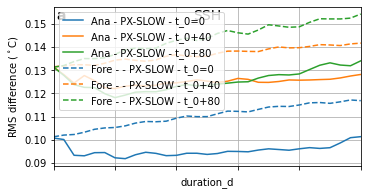

In [56]:


# gs to make a 4 row, 7 col plot
gs = gridspec.GridSpec(nrows=2,ncols=2,wspace=0.18, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[12,6])
ax = None

# SSH
ax = fig.add_subplot(gs[0,0])

XBTPX_SSH_RMS_Ana.sel(loop_day=slice(8065,8073)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - PX-SLOW - t_0=0',color='C0')
XBTPX_SSH_RMS_Ana.sel(loop_day=slice(8109,8117)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - PX-SLOW - t_0+40',color='C1')
XBTPX_SSH_RMS_Ana.sel(loop_day=slice(8141,8149)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - PX-SLOW - t_0+80',color='C2')

XBTPX_SSH_RMS_For.sel(loop_day=slice(8065,8073)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - - PX-SLOW - t_0=0',color='C0',linestyle='--')
XBTPX_SSH_RMS_For.sel(loop_day=slice(8109,8117)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - - PX-SLOW - t_0+40',color='C1',linestyle='--')
XBTPX_SSH_RMS_For.sel(loop_day=slice(8141,8149)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - - PX-SLOW - t_0+80',color='C2',linestyle='--')
ax.set_ylabel(r'RMS difference ($^\circ$C)')
plt.grid()
ax.set_xlim([0,5])
ax.text(0.01,0.99,'a', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.text(0.5,0.99,'SSH', transform=ax.transAxes,fontsize=14, va='top',ha='center')
ax.set_xticklabels('')
ax.legend()

# # SST
# ax = fig.add_subplot(gs[0,1])
# XBTNS_SST_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - XBT-N+S',color='C0')
# XBTS_SST_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - XBT-S',color='C1')
# XBTPX_SST_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - PX-SLOW',color='C2')
# XBTNS_SST_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - XBT-N+S',color='C0',linestyle='--')
# XBTS_SST_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - XBT-S',color='C1',linestyle='--')
# XBTPX_SST_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - PX-SLOW',color='C2',linestyle='--')
# ax.set_xlabel('')
# ax.set_ylabel(r'RMS difference ($^\circ$C)')
# plt.grid()
# ax.set_xlim([0,5])
# ax.text(0.01,0.99,'b', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
# ax.text(0.5,0.99,'SST', transform=ax.transAxes,fontsize=14, va='top',ha='center')
# ax.set_xticklabels('')

# #temp250
# ax = fig.add_subplot(gs[1,0])
# XBTNS_temp250_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - XBT-N+S',color='C0')
# XBTS_temp250_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - XBT-S',color='C1')
# XBTPX_temp250_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - PX-SLOW',color='C2')
# XBTNS_temp250_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - XBT-N+S',color='C0',linestyle='--')
# XBTS_temp250_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - XBT-S',color='C1',linestyle='--')
# XBTPX_temp250_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - PX-SLOW',color='C2',linestyle='--')
# ax.set_xlabel('Cycle time (days)')
# ax.set_ylabel(r'RMS difference ($^\circ$C)')
# plt.grid()
# ax.set_xlim([0,5])
# ax.set_ylim([1.3,2.5])
# ax.text(0.01,0.99,'c', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
# ax.text(0.5,0.99,'Temp (250 m)', transform=ax.transAxes,fontsize=14, va='top',ha='center')
# plt.legend(frameon=False)

# #temp500
# ax = fig.add_subplot(gs[1,1])
# XBTNS_temp500_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - XBT-N+S',color='C0')
# XBTS_temp500_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - XBT-S',color='C1')
# XBTPX_temp500_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Ana - PX-SLOW',color='C2')
# XBTNS_temp500_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - XBT-N+S',color='C0',linestyle='--')
# XBTS_temp500_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - XBT-S',color='C1',linestyle='--')
# XBTPX_temp500_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(ax=ax,x='duration_d',label='Fore - PX-SLOW',color='C2',linestyle='--')
# ax.set_xlabel('Cycle time (days)')
# ax.set_ylabel(r'RMS difference ($^\circ$C)')
# plt.grid()
# ax.set_xlim([0,5])
# ax.set_ylim([0.95,2])
# ax.text(0.01,0.99,'d', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
# ax.text(0.5,0.99,'Temp (500 m)', transform=ax.transAxes,fontsize=14, va='top',ha='center')


In [ ]:
STOP

In [ ]:
ossefilepath = obsOSSEFilePath2
modfilepath = modOSSEFilePath2


timeVec = np.zeros(len(datelist))
JobsInitialXBT = np.zeros(len(datelist))
JobsInitialALL = np.zeros(len(datelist))
JobsInitialSST = np.zeros(len(datelist))
JobsInitialSSH = np.zeros(len(datelist))
JobsFinalXBT = np.zeros(len(datelist))
JobsFinalSST = np.zeros(len(datelist))
JobsFinalSSH = np.zeros(len(datelist))
JobsFinalALL = np.zeros(len(datelist))
TLcost_function = np.zeros([15,len(datelist)])
NLcost_function = np.zeros([2,12,len(datelist)])

fig,ax=plt.subplots(nrows=2,figsize=(10,5))

rr=0
for dates in datelist:

    filenameObs = ossefilepath+prefixObs+str(dates)+'.nc'
    filenameMod = modfilepath+prefixMod+'0'+str(dates)+'.nc'

    obs = xr.open_dataset(filenameObs).load()
    mod = xr.open_dataset(filenameMod).load()

    obsALL = obs.obs_value.where(~np.isnan(mod.obs_scale), drop=True)
    obsXBT = obs.obs_value.where((obs.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    obsSST = obs.obs_value.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    obsSSH = obs.obs_value.where((obs.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrALL = obs.obs_error.where(~np.isnan(mod.obs_scale), drop=True)
    obsErrXBT = obs.obs_error.where((obs.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrSST = obs.obs_error.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrSSH = obs.obs_error.where((obs.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialALL = mod.NLmodel_initial.where(~np.isnan(mod.obs_scale), drop=True)
    modInitialXBT = mod.NLmodel_initial.where((mod.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialSST = mod.NLmodel_initial.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialSSH = mod.NLmodel_initial.where((mod.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalALL = mod.NLmodel_value.where(~np.isnan(mod.obs_scale), drop=True)
    modFinalXBT = mod.NLmodel_value.where((mod.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalSST = mod.NLmodel_value.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalSSH = mod.NLmodel_value.where((mod.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)

    JobsInitialALL[rr] = np.nansum((obsALL - modInitialALL)**2 / obsErrALL)
    JobsInitialXBT[rr] = np.nansum((obsXBT - modInitialXBT)**2 / obsErrXBT)
    JobsInitialSST[rr] = np.nansum((obsSST - modInitialSST)**2 / obsErrSST)
    JobsInitialSSH[rr] = np.nansum((obsSSH - modInitialSSH)**2 / obsErrSSH)
    JobsFinalALL[rr] = np.nansum((obsALL - modFinalALL)**2 / obsErrALL)
    JobsFinalXBT[rr] = np.nansum((obsXBT - modFinalXBT)**2 / obsErrXBT)
    JobsFinalSST[rr] = np.nansum((obsSST - modFinalSST)**2 / obsErrSST)
    JobsFinalSSH[rr] = np.nansum((obsSSH - modFinalSSH)**2 / obsErrSSH)
    TLcost_function[:,rr] = mod.TLcost_function
    NLcost_function[:,:,rr] = mod.NLcost_function
    
    if rr==0:
        ax[0].plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,color='C0',linewidth=0,marker='.',label='ALL')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values,color='C0',linewidth=0,marker='.',label='SST')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values,color='C1',linewidth=0,marker='.',label='SSH')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values,color='C2',linewidth=0,marker='.',label='XBT')
        ax[1].plot(np.nanmean(dates),(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.',label='ALL')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.',label='SST/Total')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values/np.shape(mod.obs_scale)*100),color='C1',linewidth=0,marker='.',label='SSH/TotalSSH')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale)*100),color='C2',linewidth=0,marker='.',label='XBT/TotalXBT')
    else:
        ax[0].plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,color='C0',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values,color='C0',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values,color='C1',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values,color='C2',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values/(np.shape(mod.obs_scale.where(mod.obs_provenance==340,drop=True)))*100),color='C0',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==405,drop=True))*100),color='C1',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==939,drop=True))*100),color='C2',linewidth=0,marker='.')
         
    

    
    timeVec[rr]=np.nanmean(dates)
    rr=rr+1
ax[0].legend()
ax[1].legend()




JobsInitialALL = xr.DataArray(JobsInitialALL,coords=[timeCoordinate],dims='time',name='JobsInitialALL')
JobsInitialXBT = xr.DataArray(JobsInitialXBT,coords=[timeCoordinate],dims='time',name='JobsInitialXBT')
JobsInitialSST = xr.DataArray(JobsInitialSST,coords=[timeCoordinate],dims='time',name='JobsInitialSST')
JobsInitialSSH = xr.DataArray(JobsInitialSSH,coords=[timeCoordinate],dims='time',name='JobsInitialSSH')
JobsFinalALL = xr.DataArray(JobsFinalALL,coords=[timeCoordinate],dims='time',name='JobsFinalALL')
JobsFinalXBT = xr.DataArray(JobsFinalXBT,coords=[timeCoordinate],dims='time',name='JobsFinalXBT')
JobsFinalSST = xr.DataArray(JobsFinalSST,coords=[timeCoordinate],dims='time',name='JobsFinalSST')
JobsFinalSSH = xr.DataArray(JobsFinalSSH,coords=[timeCoordinate],dims='time',name='JobsFinalSSH')
cycle = xr.DataArray(timeVec,coords=[timeCoordinate],dims='time',name='cycle')
TLcost_function = xr.DataArray(TLcost_function,coords=[iteration,timeCoordinate],dims=['inner_loop','time'],name='TLcost_function')
NLcost_function = xr.DataArray(NLcost_function,coords=[Mouter, cost_var, timeCoordinate],dims=['Mouter','cost_var','time'],name='NLcost_function')

outputs = [JobsInitialALL,JobsInitialXBT,JobsInitialSST,JobsInitialSSH,JobsFinalALL,JobsFinalXBT,JobsFinalSST,JobsFinalSSH,cycle,TLcost_function,NLcost_function]

ds2 = xr.merge(outputs)

In [ ]:
mod.obs_error.where(mod.obs_provenance==939,drop=True).plot(linewidth=0,marker='.')

In [ ]:
plt.plot(mod.obs_time.where((mod.obs_provenance==939),drop=True),mod.obs_depth.where((mod.obs_provenance==939),drop=True),linewidth=0,marker='.',markersize=2,label='All XBT')
plt.plot(mod.obs_time.where((mod.obs_provenance==939)&(~np.isnan(mod.obs_scale)),drop=True),mod.obs_depth.where((mod.obs_provenance==939)&(~np.isnan(mod.obs_scale)),drop=True),linewidth=0,marker='.',markersize=2,label='Rejected XBT')
plt.legend()

In [ ]:
ossefilepath = obsOSSEFilePath3
modfilepath = modOSSEFilePath3


timeVec = np.zeros(len(datelist))
JobsInitialXBT = np.zeros(len(datelist))
JobsInitialALL = np.zeros(len(datelist))
JobsInitialSST = np.zeros(len(datelist))
JobsInitialSSH = np.zeros(len(datelist))
JobsFinalXBT = np.zeros(len(datelist))
JobsFinalSST = np.zeros(len(datelist))
JobsFinalSSH = np.zeros(len(datelist))
JobsFinalALL = np.zeros(len(datelist))
TLcost_function = np.zeros([15,len(datelist)])
NLcost_function = np.zeros([2,12,len(datelist)])
fig,ax=plt.subplots(nrows=2,figsize=(10,5))

rr=0
for dates in datelist:

    filenameObs = ossefilepath+prefixObs+str(dates)+'.nc'
    filenameMod = modfilepath+prefixMod+'0'+str(dates)+'.nc'

    obs = xr.open_dataset(filenameObs).load()
    mod = xr.open_dataset(filenameMod).load()

    obsALL = obs.obs_value.where(~np.isnan(mod.obs_scale), drop=True)
    obsXBT = obs.obs_value.where((obs.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    obsSST = obs.obs_value.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    obsSSH = obs.obs_value.where((obs.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrALL = obs.obs_error.where(~np.isnan(mod.obs_scale), drop=True)
    obsErrXBT = obs.obs_error.where((obs.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrSST = obs.obs_error.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrSSH = obs.obs_error.where((obs.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialALL = mod.NLmodel_initial.where(~np.isnan(mod.obs_scale), drop=True)
    modInitialXBT = mod.NLmodel_initial.where((mod.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialSST = mod.NLmodel_initial.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialSSH = mod.NLmodel_initial.where((mod.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalALL = mod.NLmodel_value.where(~np.isnan(mod.obs_scale), drop=True)
    modFinalXBT = mod.NLmodel_value.where((mod.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalSST = mod.NLmodel_value.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalSSH = mod.NLmodel_value.where((mod.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)

    JobsInitialALL[rr] = np.nansum((obsALL - modInitialALL)**2 / obsErrALL)
    JobsInitialXBT[rr] = np.nansum((obsXBT - modInitialXBT)**2 / obsErrXBT)
    JobsInitialSST[rr] = np.nansum((obsSST - modInitialSST)**2 / obsErrSST)
    JobsInitialSSH[rr] = np.nansum((obsSSH - modInitialSSH)**2 / obsErrSSH)
    JobsFinalALL[rr] = np.nansum((obsALL - modFinalALL)**2 / obsErrALL)
    JobsFinalXBT[rr] = np.nansum((obsXBT - modFinalXBT)**2 / obsErrXBT)
    JobsFinalSST[rr] = np.nansum((obsSST - modFinalSST)**2 / obsErrSST)
    JobsFinalSSH[rr] = np.nansum((obsSSH - modFinalSSH)**2 / obsErrSSH)
    TLcost_function[:,rr] = mod.TLcost_function
    NLcost_function[:,:,rr] = mod.NLcost_function
    
    if rr==0:
        ax[0].plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,color='C0',linewidth=0,marker='.',label='ALL')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values,color='C0',linewidth=0,marker='.',label='SST')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values,color='C1',linewidth=0,marker='.',label='SSH')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values,color='C2',linewidth=0,marker='.',label='XBT')
        ax[1].plot(np.nanmean(dates),(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.',label='ALL')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.',label='SST/Total')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values/np.shape(mod.obs_scale)*100),color='C1',linewidth=0,marker='.',label='SSH/TotalSSH')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale)*100),color='C2',linewidth=0,marker='.',label='XBT/TotalXBT')
    else:
        ax[0].plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,color='C0',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values,color='C0',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values,color='C1',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values,color='C2',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values/(np.shape(mod.obs_scale.where(mod.obs_provenance==340,drop=True)))*100),color='C0',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==405,drop=True))*100),color='C1',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==939,drop=True))*100),color='C2',linewidth=0,marker='.')
         
    

    
    timeVec[rr]=np.nanmean(dates)
    rr=rr+1
ax[0].legend()
ax[1].legend()


JobsInitialALL = xr.DataArray(JobsInitialALL,coords=[timeCoordinate],dims='time',name='JobsInitialALL')
JobsInitialXBT = xr.DataArray(JobsInitialXBT,coords=[timeCoordinate],dims='time',name='JobsInitialXBT')
JobsInitialSST = xr.DataArray(JobsInitialSST,coords=[timeCoordinate],dims='time',name='JobsInitialSST')
JobsInitialSSH = xr.DataArray(JobsInitialSSH,coords=[timeCoordinate],dims='time',name='JobsInitialSSH')
JobsFinalALL = xr.DataArray(JobsFinalALL,coords=[timeCoordinate],dims='time',name='JobsFinalALL')
JobsFinalXBT = xr.DataArray(JobsFinalXBT,coords=[timeCoordinate],dims='time',name='JobsFinalXBT')
JobsFinalSST = xr.DataArray(JobsFinalSST,coords=[timeCoordinate],dims='time',name='JobsFinalSST')
JobsFinalSSH = xr.DataArray(JobsFinalSSH,coords=[timeCoordinate],dims='time',name='JobsFinalSSH')
cycle = xr.DataArray(timeVec,coords=[timeCoordinate],dims='time',name='cycle')
TLcost_function = xr.DataArray(TLcost_function,coords=[iteration,timeCoordinate],dims=['inner_loop','time'],name='TLcost_function')
NLcost_function = xr.DataArray(NLcost_function,coords=[Mouter, cost_var, timeCoordinate],dims=['Mouter','cost_var','time'],name='NLcost_function')

outputs = [JobsInitialALL,JobsInitialXBT,JobsInitialSST,JobsInitialSSH,JobsFinalALL,JobsFinalXBT,JobsFinalSST,JobsFinalSSH,cycle,TLcost_function,NLcost_function]

ds3 = xr.merge(outputs)

In [ ]:
ossefilepath = obsOSSEFilePath4
modfilepath = modOSSEFilePath4


timeVec = np.zeros(len(datelist))
JobsInitialXBT = np.zeros(len(datelist))
JobsInitialALL = np.zeros(len(datelist))
JobsInitialSST = np.zeros(len(datelist))
JobsInitialSSH = np.zeros(len(datelist))
JobsFinalXBT = np.zeros(len(datelist))
JobsFinalSST = np.zeros(len(datelist))
JobsFinalSSH = np.zeros(len(datelist))
JobsFinalALL = np.zeros(len(datelist))
TLcost_function = np.zeros([15,len(datelist)])
NLcost_function = np.zeros([2,12,len(datelist)])
fig,ax=plt.subplots(nrows=2,figsize=(10,5))

rr=0
for dates in datelist:

    filenameObs = ossefilepath+prefixObs+str(dates)+'.nc'
    filenameMod = modfilepath+prefixMod+'0'+str(dates)+'.nc'

    obs = xr.open_dataset(filenameObs).load()
    mod = xr.open_dataset(filenameMod).load()

    obsALL = obs.obs_value.where(~np.isnan(mod.obs_scale), drop=True)
    obsXBT = obs.obs_value.where((obs.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    obsSST = obs.obs_value.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    obsSSH = obs.obs_value.where((obs.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrALL = obs.obs_error.where(~np.isnan(mod.obs_scale), drop=True)
    obsErrXBT = obs.obs_error.where((obs.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrSST = obs.obs_error.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrSSH = obs.obs_error.where((obs.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialALL = mod.NLmodel_initial.where(~np.isnan(mod.obs_scale), drop=True)
    modInitialXBT = mod.NLmodel_initial.where((mod.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialSST = mod.NLmodel_initial.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialSSH = mod.NLmodel_initial.where((mod.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalALL = mod.NLmodel_value.where(~np.isnan(mod.obs_scale), drop=True)
    modFinalXBT = mod.NLmodel_value.where((mod.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalSST = mod.NLmodel_value.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalSSH = mod.NLmodel_value.where((mod.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)

    JobsInitialALL[rr] = np.nansum((obsALL - modInitialALL)**2 / obsErrALL)
    JobsInitialXBT[rr] = np.nansum((obsXBT - modInitialXBT)**2 / obsErrXBT)
    JobsInitialSST[rr] = np.nansum((obsSST - modInitialSST)**2 / obsErrSST)
    JobsInitialSSH[rr] = np.nansum((obsSSH - modInitialSSH)**2 / obsErrSSH)
    JobsFinalALL[rr] = np.nansum((obsALL - modFinalALL)**2 / obsErrALL)
    JobsFinalXBT[rr] = np.nansum((obsXBT - modFinalXBT)**2 / obsErrXBT)
    JobsFinalSST[rr] = np.nansum((obsSST - modFinalSST)**2 / obsErrSST)
    JobsFinalSSH[rr] = np.nansum((obsSSH - modFinalSSH)**2 / obsErrSSH)
    TLcost_function[:,rr] = mod.TLcost_function
    NLcost_function[:,:,rr] = mod.NLcost_function
    
    if rr==0:
        ax[0].plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,color='C0',linewidth=0,marker='.',label='ALL')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values,color='C0',linewidth=0,marker='.',label='SST')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values,color='C1',linewidth=0,marker='.',label='SSH')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values,color='C2',linewidth=0,marker='.',label='XBT')
        ax[1].plot(np.nanmean(dates),(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.',label='ALL')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.',label='SST/Total')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values/np.shape(mod.obs_scale)*100),color='C1',linewidth=0,marker='.',label='SSH/TotalSSH')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale)*100),color='C2',linewidth=0,marker='.',label='XBT/TotalXBT')
    else:
        ax[0].plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,color='C0',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values,color='C0',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values,color='C1',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values,color='C2',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values/(np.shape(mod.obs_scale.where(mod.obs_provenance==340,drop=True)))*100),color='C0',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==405,drop=True))*100),color='C1',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==939,drop=True))*100),color='C2',linewidth=0,marker='.')
         
    

    
    timeVec[rr]=np.nanmean(dates)
    rr=rr+1
ax[0].legend()
ax[1].legend()

JobsInitialALL = xr.DataArray(JobsInitialALL,coords=[timeCoordinate],dims='time',name='JobsInitialALL')
JobsInitialXBT = xr.DataArray(JobsInitialXBT,coords=[timeCoordinate],dims='time',name='JobsInitialXBT')
JobsInitialSST = xr.DataArray(JobsInitialSST,coords=[timeCoordinate],dims='time',name='JobsInitialSST')
JobsInitialSSH = xr.DataArray(JobsInitialSSH,coords=[timeCoordinate],dims='time',name='JobsInitialSSH')
JobsFinalALL = xr.DataArray(JobsFinalALL,coords=[timeCoordinate],dims='time',name='JobsFinalALL')
JobsFinalXBT = xr.DataArray(JobsFinalXBT,coords=[timeCoordinate],dims='time',name='JobsFinalXBT')
JobsFinalSST = xr.DataArray(JobsFinalSST,coords=[timeCoordinate],dims='time',name='JobsFinalSST')
JobsFinalSSH = xr.DataArray(JobsFinalSSH,coords=[timeCoordinate],dims='time',name='JobsFinalSSH')
cycle = xr.DataArray(timeVec,coords=[timeCoordinate],dims='time',name='cycle')
TLcost_function = xr.DataArray(TLcost_function,coords=[iteration,timeCoordinate],dims=['inner_loop','time'],name='TLcost_function')
NLcost_function = xr.DataArray(NLcost_function,coords=[Mouter, cost_var, timeCoordinate],dims=['Mouter','cost_var','time'],name='NLcost_function')

outputs = [JobsInitialALL,JobsInitialXBT,JobsInitialSST,JobsInitialSSH,JobsFinalALL,JobsFinalXBT,JobsFinalSST,JobsFinalSSH,cycle,TLcost_function,NLcost_function]

ds4 = xr.merge(outputs)

In [ ]:
(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100).round(2)

In [ ]:
plt.plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,linewidth=0,marker='.')

In [ ]:
obsSST

In [ ]:
modInitialSST

In [ ]:
modFinalSST

In [ ]:
obsErrSST

In [ ]:
((obsSST - modInitialSST)**2/obsErrSST).plot(linewidth=0,marker='.')

In [ ]:
((obsSST - modInitialSST)**2/obsErrSST)[20001]

In [ ]:
obsSST[20001]

In [ ]:
modInitialSST[20001]


In [ ]:
modInitialSST


In [ ]:
((obsSST - modFinalSST)**2/obsErrSST).plot(linewidth=0,marker='.')

In [ ]:
JobsInitialSST

In [ ]:
ds2.NLcost_function

In [ ]:
((obsALL - modFinalALL)**2).plot()
plt.show()
obsErrALL.plot(marker='o')

In [ ]:
((obsALL - modFinalALL)**2).isel(datum=158201)

In [ ]:
obsALL.isel(datum=158201)

In [ ]:
modFinalALL.isel(datum=158201)

In [ ]:
modInitialALL.isel(datum=158201)

In [ ]:
np.argmax(((obsALL - modFinalALL)**2).values)

In [ ]:
mod.NLmodel_initial!=0

In [ ]:
pRangeXBT

In [ ]:
mod.NLmodel_value.where((obs.obs_provenance!=pRangeSST)|((obs.obs_provenance==pRangeSST)&(mod.NLmodel_initial!=0))|((obs.obs_provenance==pRangeXBT)&(mod.NLmodel_initial!=0)),drop=True)

In [ ]:
mod.NLmodel_value.where(~np.isnan(mod.obs_scale), drop=True)

In [ ]:
np.isnan(mod.obs_scale)

In [ ]:
fig, ax = plt.subplots(4,figsize=(10,5))
ax[0].plot(timeVec,JobsInitialSST,linestyle='--',marker='o',color="C0",label='Jobs initial SST')
# ax.plot(timeVec,JobsInitialSSH, linestyle='--',marker='o',color="C1",label='Jobs initial SSH')
ax[0].plot(timeVec,JobsFinalSST, linestyle='-',marker='o',color="C0",label='Jobs final SST')
# ax.plot(timeVec,JobsFinalSSH, linestyle='-',marker='o',color="C1",label='Jobs final SSH')
# ax[1].plot(timeVec,JobsInitialSST,linestyle='--',marker='o',color="C0",label='Jobs initial SST')
ax[1].plot(timeVec,JobsInitialSSH, linestyle='--',marker='o',color="C1",label='Jobs initial SSH')
# ax[0].plot(timeVec,JobsFinalSST, linestyle='-',marker='o',color="C0",label='Jobs final SST')
ax[1].plot(timeVec,JobsFinalSSH, linestyle='-',marker='o',color="C1",label='Jobs final SSH')
ax[2].plot(timeVec,JobsInitialXBT, linestyle='--',marker='o',color="C2",label='Jobs initial XBT')
# ax[0].plot(timeVec,JobsFinalSST, linestyle='-',marker='o',color="C0",label='Jobs final SST')
ax[2].plot(timeVec,JobsFinalXBT, linestyle='-',marker='o',color="C2",label='Jobs final XBT')
ax[3].plot(timeVec,JobsInitialALL, linestyle='--',marker='o',color="C3",label='Jobs initial ALL')
# ax[0].plot(timeVec,JobsFinalSST, linestyle='-',marker='o',color="C0",label='Jobs final SST')
ax[3].plot(timeVec,JobsFinalALL, linestyle='-',marker='o',color="C3",label='Jobs final ALL')
ax[0].grid()
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()


In [ ]:
fig, ax = plt.subplots(1,figsize=(10,5))
ax.plot(timeVec,JobsInitialSST,linestyle='--',marker='o',color="C0",label='Jobs initial SST')
ax.plot(timeVec,JobsFinalSST, linestyle='-',marker='o',color="C0",label='Jobs final SST')
ax.plot(timeVec,JobsInitialSSH, linestyle='--',marker='o',color="C1",label='Jobs initial SSH')
ax.plot(timeVec,JobsFinalSSH, linestyle='-',marker='o',color="C1",label='Jobs final SSH')
ax.plot(timeVec,JobsInitialXBT, linestyle='--',marker='o',color="C2",label='Jobs initial XBT')
ax.plot(timeVec,JobsFinalXBT, linestyle='-',marker='o',color="C2",label='Jobs final XBT')
ax.plot(timeVec,JobsInitialALL, linestyle='--',marker='o',color="C3",label='Jobs initial ALL')
ax.plot(timeVec,JobsFinalALL, linestyle='-',marker='o',color="C3",label='Jobs final ALL')
ax.grid()
ax.legend()
ax.legend()
ax.legend()
ax.legend()


In [ ]:
fig, ax = plt.subplots(4,figsize=(10,5))
ax[0].plot(timeVec,JobsFinalSST/JobsInitialSST, linestyle='-',marker='o',color="C0",label='J_{final}/J_{ini} SST')
ax[1].plot(timeVec,JobsFinalSSH/JobsInitialSSH, linestyle='-',marker='o',color="C1",label='J_{final}/J_{ini} SSH')
ax[2].plot(timeVec,JobsFinalXBT/JobsInitialXBT, linestyle='-',marker='o',color="C2",label='J_{final}/J_{ini} XBT')
ax[3].plot(timeVec,JobsFinalALL/JobsInitialALL, linestyle='-',marker='o',color="C3",label='J_{final}/J_{ini} ALL')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()


In [ ]:
fig, ax = plt.subplots(4,figsize=(10,5))
ax[0].plot(timeVec,JobsFinalSST/JobsInitialSST, linestyle='-',marker='o',color="C0",label='J_{final}/J_{ini} SST')
ax[1].plot(timeVec,JobsFinalSSH/JobsInitialSSH, linestyle='-',marker='o',color="C1",label='J_{final}/J_{ini} SSH')
ax[2].plot(timeVec,JobsFinalXBT/JobsInitialXBT, linestyle='-',marker='o',color="C2",label='J_{final}/J_{ini} XBT')
ax[3].plot(timeVec,JobsFinalALL/JobsInitialALL, linestyle='-',marker='o',color="C3",label='J_{final}/J_{ini} ALL')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()


In [ ]:
fig, ax = plt.subplots(1,figsize=(10,5)) 
ax.plot(timeVec,JobsFinalSST/JobsInitialSST, linestyle='-',marker='o',color="C0",label='SST')
ax.plot(timeVec,JobsFinalSSH/JobsInitialSSH, linestyle='-',marker='o',color="C1",label='SSH')
ax.plot(timeVec,JobsFinalXBT/JobsInitialXBT, linestyle='-',marker='o',color="C2",label='XBT')
ax.plot(timeVec,JobsFinalALL/JobsInitialALL, linestyle='-',marker='o',color="C3",label='ALL')
ax.grid()
ax.legend()
ax.legend()
ax.legend()
ax.legend()
ax.set_title('Ratio of $J_{final}/J_{ini}$ for each obs type')

In [ ]:
fig, ax = plt.subplots(1,figsize=(10,5))
ax.bar(timeVec,JobsInitialSST,color="C0",label='Jobs SST')
ax.bar(timeVec,JobsInitialSSH,bottom=JobsInitialSST,color="C1",label='Jobs SSH')
fig.suptitle('Jobs initial')
ax.grid()
ax.legend()

fig, ax = plt.subplots(1,figsize=(10,5))
ax.bar(timeVec,JobsFinalSST,color="C0",label='Jobs SST')
ax.bar(timeVec,JobsFinalSSH,bottom=JobsFinalSST,color="C1",label='Jobs SSH')
fig.suptitle('Jobs final')
ax.grid()
ax.legend()

Now do same but with ds outputs

In [ ]:
fig, ax = plt.subplots(1,figsize=(10,5))
ds1.JobsInitialSST.plot(ax=ax,linestyle='--',marker='o',color="C0",label='Jobs initial SST')
ds1.JobsFinalSST.plot(ax=ax,linestyle='-',marker='o',color="C0",label='Jobs final SST')
ds1.JobsInitialSSH.plot(ax=ax,linestyle='--',marker='o',color="C1",label='Jobs initial SSH')
ds1.JobsFinalSSH.plot(ax=ax,linestyle='-',marker='o',color="C1",label='Jobs final SSH')
ds1.JobsInitialXBT.plot(ax=ax,linestyle='--',marker='o',color="C2",label='Jobs initial XBT')
ds1.JobsFinalXBT.plot(ax=ax,linestyle='-',marker='o',color="C2",label='Jobs final XBT')
ds1.JobsInitialALL.plot(ax=ax,linestyle='--',marker='o',color="C3",label='Jobs initial ALL')
ds1.JobsFinalALL.plot(ax=ax,linestyle='-',marker='o',color="C3",label='Jobs final ALL')
ax.grid()
ax.legend()
ax.legend()
ax.legend()
ax.legend()


In [ ]:

# gs to make a 4 row, 7 col plot
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,5])
ax = None



ax = fig.add_subplot(gs[0,0])
(ds1.JobsFinalALL/ds1.JobsInitialALL).plot(ax=ax,linestyle='--',marker='o',color="C0",label='Surf')
(ds2.JobsFinalALL/ds2.JobsInitialALL).plot(ax=ax,linestyle='--',marker='o',color="C3",label='XBT-N+S')
(ds3.JobsFinalALL/ds3.JobsInitialALL).plot(ax=ax,linestyle='--',marker='o',color="C1",label='XBT-N')
(ds4.JobsFinalALL/ds4.JobsInitialALL).plot(ax=ax,linestyle='--',marker='o',color="C2",label='XBT-S')
ax.legend()
ax.set_ylabel('Ratio of Final/Initial observation cost function')

In [ ]:
print(str(((ds1.JobsFinalALL/ds1.JobsInitialALL).mean(dim='time')).round(2).values)+' Surf')
print(str(((ds2.JobsFinalALL/ds2.JobsInitialALL).mean(dim='time')).round(2).values)+' XBT-N+S')
print(str(((ds3.JobsFinalALL/ds3.JobsInitialALL).mean(dim='time')).round(2).values)+' XBT-N')
print(str(((ds4.JobsFinalALL/ds4.JobsInitialALL).mean(dim='time')).round(2).values)+' XBT-S')

In [ ]:
print(ds2.JobsInitialALL)
print(ds2.JobsInitialALL.mean(dim='time'))
print(ds2.JobsInitialALL.isel(time=-1))

In [ ]:
print(ds2.JobsFinalALL)
print(ds2.JobsFinalALL.mean(dim='time'))
print(ds2.JobsFinalALL.isel(time=-1))

In [ ]:
print(ds2.NLcost_function.isel(Mouter=1,time=-1))
print(ds2.NLcost_function.isel(Mouter=0,time=-1))

In [ ]:
xbt = mod.obs_depth.where(mod.obs_provenance==939,drop=True)
mod.obs_provenance.where(np.isnan(mod.obs_scale),drop=True).plot(linewidth=0,marker='.')
plt.show()
xbt.plot(linewidth=0,marker='.')
plt.show()
mod.obs_depth.where(mod.obs_provenance==939,drop=True).plot(linewidth=0,marker='.')
plt.show()
mod.obs_provenance.where(np.isnan(mod.obs_scale),drop=True).plot(linewidth=0,marker='.')
plt.show()
mod.obs_provenance.plot(linewidth=0,marker='.')
plt.show()
mod.obs_provenance.plot.hist()
plt.show()
mod.obs_provenance.where(np.isnan(mod.obs_scale),drop=True).plot.hist()

In [ ]:
mod.obs_provenance.plot.hist()
# plt.show()
# mod.obs_provenance.where(np.isnan(mod.obs_scale),drop=True).plot.hist()
# plt.show()


In [ ]:

# gs to make a 4 row, 7 col plot
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,5])
ax = None



ax = fig.add_subplot(gs[0,0])
(ds1.TLcost_function.mean(dim='time')/ds1.TLcost_function.mean(dim='time').isel(inner_loop=0)).plot(ax=ax,linestyle='--',marker='o',color="C0",label='Surf')
(ds2.TLcost_function.mean(dim='time')/ds2.TLcost_function.mean(dim='time').isel(inner_loop=0)).plot(ax=ax,linestyle='--',marker='o',color="C3",label='XBT-N+S')
(ds3.TLcost_function.mean(dim='time')/ds3.TLcost_function.mean(dim='time').isel(inner_loop=0)).plot(ax=ax,linestyle='--',marker='o',color="C1",label='XBT-N')
(ds4.TLcost_function.mean(dim='time')/ds4.TLcost_function.mean(dim='time').isel(inner_loop=0)).plot(ax=ax,linestyle='--',marker='o',color="C2",label='XBT-S')
ax.plot(15,(ds1.NLcost_function.isel(Mouter=1,time=-1,cost_var=0)/ds1.NLcost_function.isel(Mouter=0,time=-1,cost_var=0)),linestyle='--',marker='x',color="C0",label='')
ax.plot(15,(ds2.NLcost_function.isel(Mouter=1,time=-1,cost_var=0)/ds2.NLcost_function.isel(Mouter=0,time=-1,cost_var=0)),linestyle='--',marker='x',color="C3",label='')
ax.plot(15,(ds3.NLcost_function.isel(Mouter=1,time=-1,cost_var=0)/ds3.NLcost_function.isel(Mouter=0,time=-1,cost_var=0)),linestyle='--',marker='x',color="C1",label='')
ax.plot(15,(ds4.NLcost_function.isel(Mouter=1,time=-1,cost_var=0)/ds4.NLcost_function.isel(Mouter=0,time=-1,cost_var=0)),linestyle='--',marker='x',color="C2",label='')
ax.legend()
ax.set_xlabel('Inner Loops')
ax.set_ylabel('Ratio of Final/Initial cost function')
ax.set_title('Reduction in cost function each loop, averaged over all assimilation windows, for the TLM (circles) and NLM (crosses)')
ax.set_xticks(iteration)
ax.grid()

In [ ]:
print(ds2.NLcost_function.isel(Mouter=1,time=-1,cost_var=0))
print(ds2.NLcost_function.isel(Mouter=0,time=-1,cost_var=0))

In [ ]:
ds2.NLcost_function.isel(time=-1)

In [ ]:
(ds1.TLcost_function.isel(time=0)/ds1.TLcost_function.isel(time=0).isel(inner_loop=0)).plot(linestyle='--',marker='o',color="C0",label='Surf')


In [ ]:
mod

In [ ]:
mod.NLcost_function.shape